In [87]:
#PARTA - TASK1: DATA PREPROCESSING

In [88]:
#a: Properly clean the dataset, handle any missing values, and remove outliers.

In [89]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
#from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
#Loading dataset and display first few rows and last few rows
df=pd.read_csv("C:\\Users\\Aynur\\Downloads\\LifeExpectancy.zip")
df

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [91]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [92]:
print(df['Year'].unique())  

[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000]


In [93]:
df.shape

(2938, 22)

In [132]:
df.dtypes

Country                          object
Year                              int64
Status                           object
LifeExpectancy                  float64
AdultMortality                  float64
InfantDeaths                      int64
Alcohol                         float64
PercentageExpenditure           float64
HepatitisB                      float64
Measles                         float64
BMI                             float64
Under5Deaths                      int64
Polio                           float64
TotalExpenditure                float64
Diphtheria                      float64
HIV/AIDS                        float64
GDP                             float64
Population                      float64
thinnessRate1To19Years          float64
thinnessRate5To9Years           float64
IncomeCompositionOfResources    float64
Schooling                       float64
dtype: object

In [136]:
duplicated=df.duplicated().sum()
duplicated

0

In [134]:
df.isnull().sum()

Country                         0
Year                            0
Status                          0
LifeExpectancy                  0
AdultMortality                  0
InfantDeaths                    0
Alcohol                         0
PercentageExpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
Under5Deaths                    0
Polio                           0
TotalExpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinnessRate1To19Years          0
thinnessRate5To9Years           0
IncomeCompositionOfResources    0
Schooling                       0
dtype: int64

In [138]:
df.columns = df.columns.str.strip()

In [98]:
df.rename(columns={'Life expectancy': 'LifeExpectancy'}, inplace=True)
df.rename(columns={'infant deaths': 'InfantDeaths'}, inplace=True)
df.rename(columns={'under-five deaths': 'Under5Deaths'}, inplace=True)
df.rename(columns={'Adult Mortality': 'AdultMortality'}, inplace=True)
df.rename(columns={'Hepatitis B': 'HepatitisB'}, inplace=True)
df.rename(columns={'Total expenditure': 'TotalExpenditure'}, inplace=True)
df.rename(columns={'thinness  1-19 years': 'thinnessRate1To19Years'}, inplace=True)
df.rename(columns={'thinness 5-9 years': 'thinnessRate5To9Years'}, inplace=True)
df.rename(columns={'Income composition of resources': 'IncomeCompositionOfResources'}, inplace=True)
df.rename(columns={'percentage expenditure': 'PercentageExpenditure'}, inplace=True)

In [99]:
df.head()

Country  Year      Status  LifeExpectancy  AdultMortality  \
0  Afghanistan  2015  Developing            65.0           263.0   
1  Afghanistan  2014  Developing            59.9           271.0   
2  Afghanistan  2013  Developing            59.9           268.0   
3  Afghanistan  2012  Developing            59.5           272.0   
4  Afghanistan  2011  Developing            59.2           275.0   

   InfantDeaths  Alcohol  PercentageExpenditure  HepatitisB  Measles  ...  \
0            62     0.01              71.279624        65.0     1154  ...   
1            64     0.01              73.523582        62.0      492  ...   
2            66     0.01              73.219243        64.0      430  ...   
3            69     0.01              78.184215        67.0     2787  ...   
4            71     0.01               7.097109        68.0     3013  ...   

   Polio  TotalExpenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0              8.16        65.0       0.1  584.259210  33736494.0   
1   58.0              8.18        62.0       0.1  612.696514    327582.0   
2   62.0              8.13        64.0       0.1  631.744976  31731688.0   
3   67.0              8.52        67.0       0.1  669.959000   3696958.0   
4   68.0              7.87        68.0       0.1   63.537231   2978599.0   

   thinnessRate1To19Years  thinnessRate5To9Years  \
0                    17.2                   17.3   
1                    17.5                   17.5   
2                    17.7                   17.7   
3                    17.9                   18.0   
4                    18.2                   18.2   

   IncomeCompositionOfResources  Schooling  
0                         0.479       10.1  
1                         0.476       10.0  
2                         0.470        9.9  
3                         0.463        9.8  
4                         0.454        9.5  

[5 rows x 22 columns]

In [140]:
 # Handle missing values based on skewness: If skewness < 0.5, data will fill with mean, if skewness > 0.5, data will fill with median
columns_missing_values = ['LifeExpectancy', 'Alcohol','BMI','Polio','AdultMortality','Diphtheria','GDP','Population','HepatitisB','Schooling','TotalExpenditure','thinnessRate1To19Years','thinnessRate5To9Years','IncomeCompositionOfResources']

for i, feature in enumerate(columns_missing_values, 1):
    skewness = df[feature].skew()
    print(f"Skewness of Fresh column: {feature}:{skewness}")
   
    if abs(skewness) < 0.5:  
        df[feature] = df[feature].fillna(df[feature].mean())
    else:
        # Use median for skewed distribution
        df[feature] = df[feature].fillna(df[feature].median())

Skewness of Fresh column: LifeExpectancy:-0.6258141148088548
Skewness of Fresh column: Alcohol:0.6463828061263803
Skewness of Fresh column: BMI:-0.220590396710427
Skewness of Fresh column: Polio:-1.237938353665554
Skewness of Fresh column: AdultMortality:0.7733455013988692
Skewness of Fresh column: Diphtheria:-1.2570414565178323
Skewness of Fresh column: GDP:1.1562124943543504
Skewness of Fresh column: Population:1.1919560054583827
Skewness of Fresh column: HepatitisB:-1.1707755742511348
Skewness of Fresh column: Schooling:-0.32062312902155854
Skewness of Fresh column: TotalExpenditure:0.2869686358402244
Skewness of Fresh column: thinnessRate1To19Years:1.0892036535177891
Skewness of Fresh column: thinnessRate5To9Years:1.1058287174213728
Skewness of Fresh column: IncomeCompositionOfResources:-0.9044023436317471


In [142]:
df['LifeExpectancy']=df['LifeExpectancy'].fillna(df['LifeExpectancy'].mean())
df['AdultMortality']=df['AdultMortality'].fillna(df['AdultMortality'].median())
df['Alcohol']=df['Alcohol'].fillna(df['Alcohol'].median())
df['HepatitisB']=df['HepatitisB'].fillna(df['HepatitisB'].mean())
df['BMI']=df['BMI'].fillna(df['BMI'].mean())
df['Polio']=df['Polio'].fillna(df['Polio'].mean())
df['TotalExpenditure']=df['TotalExpenditure'].fillna(df['TotalExpenditure'].median())
df['Diphtheria']=df['Diphtheria'].fillna(df['Diphtheria'].mean())
df['GDP']=df['GDP'].fillna(df['GDP'].median())
df['Population']=df['Population'].fillna(df['Population'].median())
df['thinnessRate1To19Years']=df['thinnessRate1To19Years'].fillna(df['thinnessRate1To19Years'].median())
df['thinnessRate5To9Years']=df['thinnessRate5To9Years'].fillna(df['thinnessRate5To9Years'].median())
df['IncomeCompositionOfResources']=df['IncomeCompositionOfResources'].fillna(df['IncomeCompositionOfResources'].mean())
df['Schooling']=df['Schooling'].fillna(df['Schooling'].mean())

In [144]:
df.isnull().sum()

Country                         0
Year                            0
Status                          0
LifeExpectancy                  0
AdultMortality                  0
InfantDeaths                    0
Alcohol                         0
PercentageExpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
Under5Deaths                    0
Polio                           0
TotalExpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinnessRate1To19Years          0
thinnessRate5To9Years           0
IncomeCompositionOfResources    0
Schooling                       0
dtype: int64

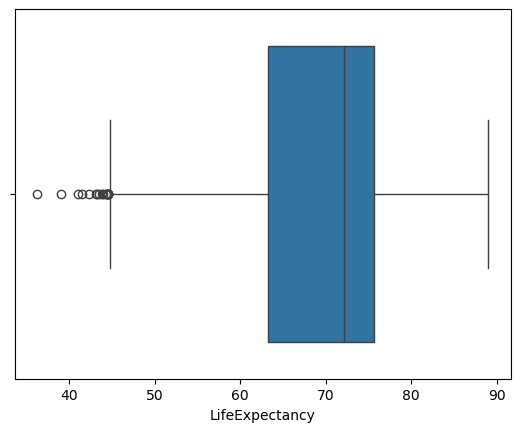

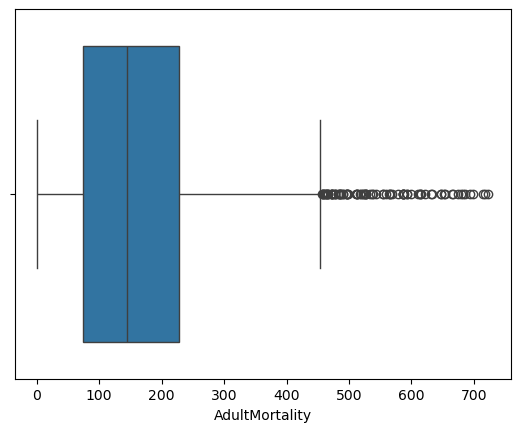

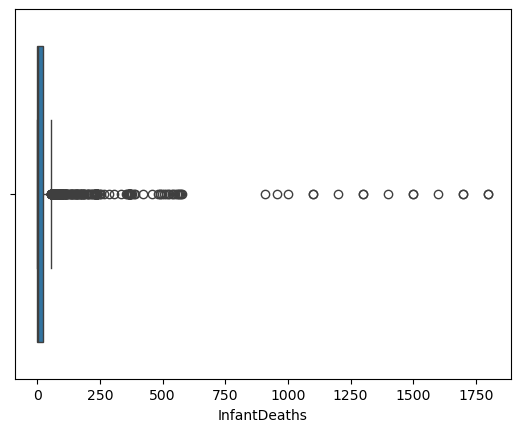

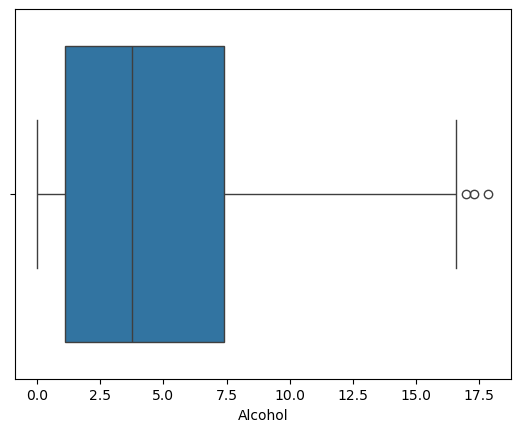

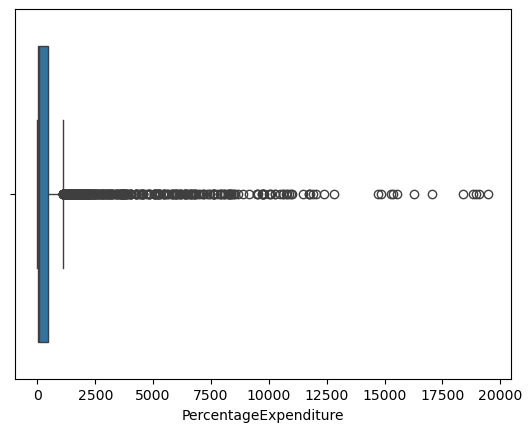

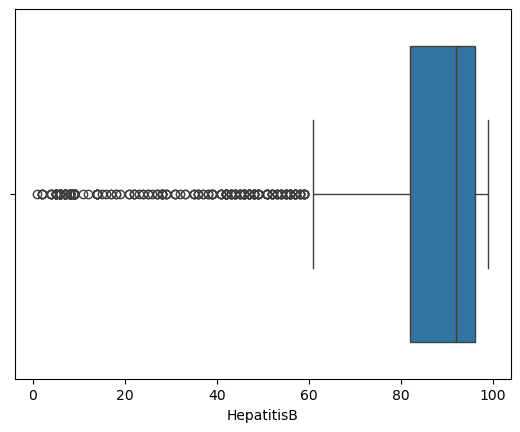

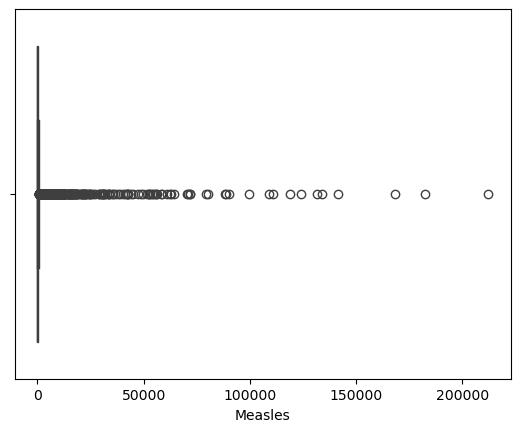

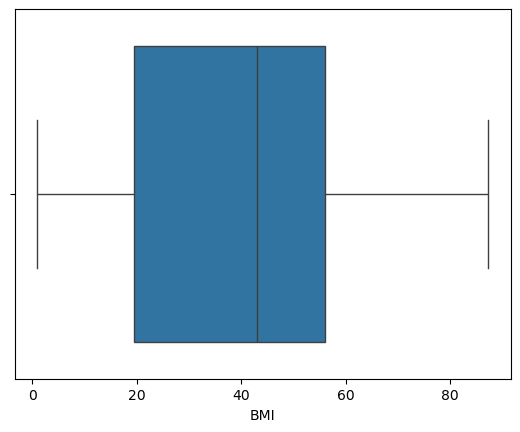

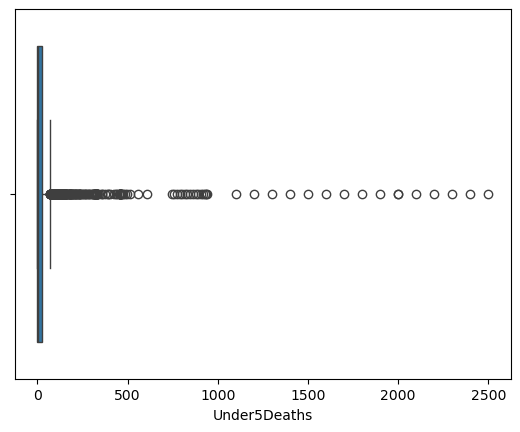

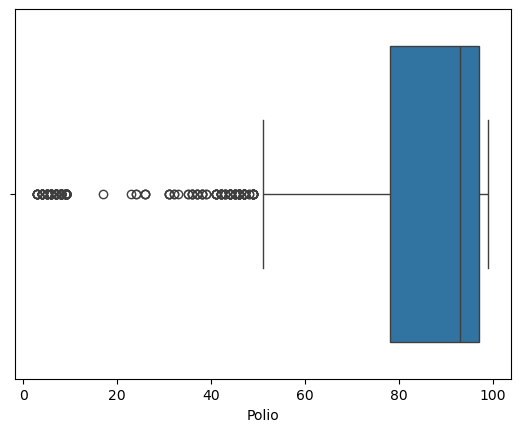

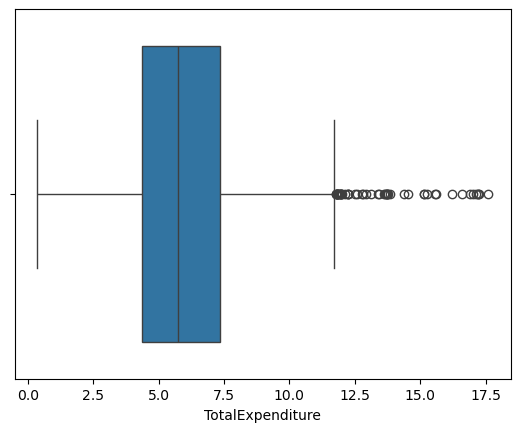

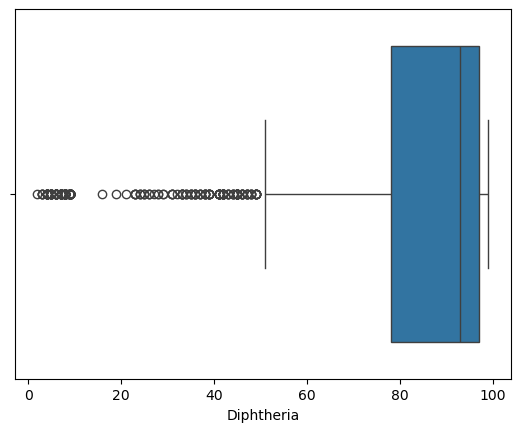

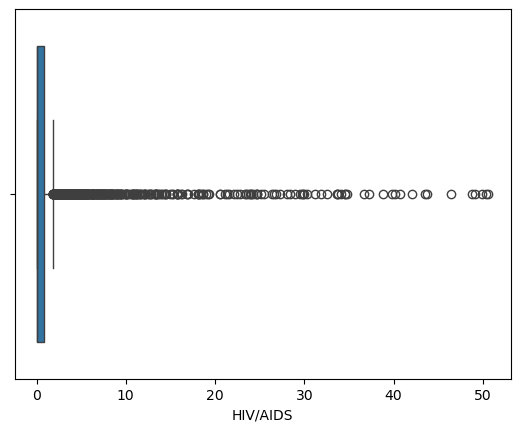

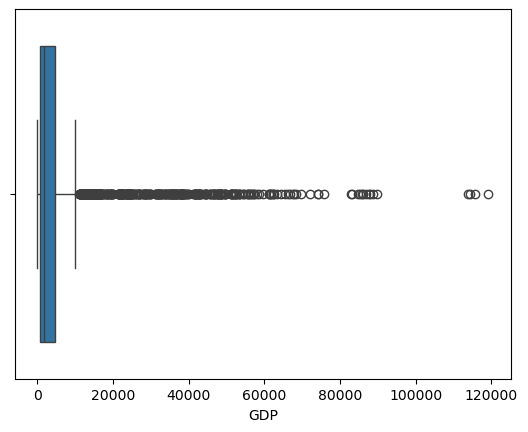

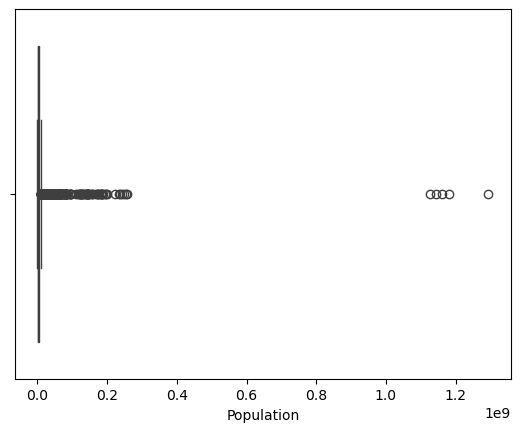

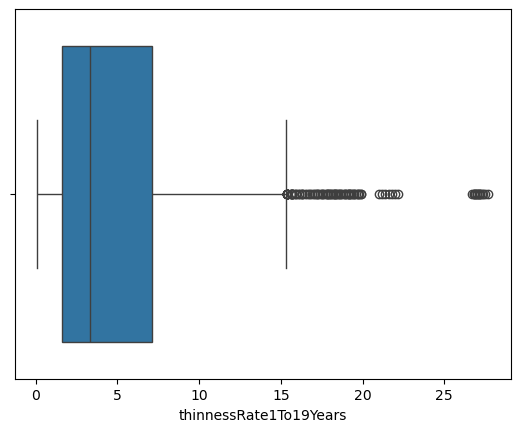

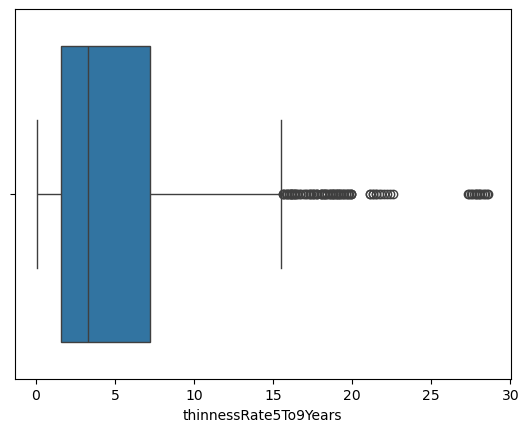

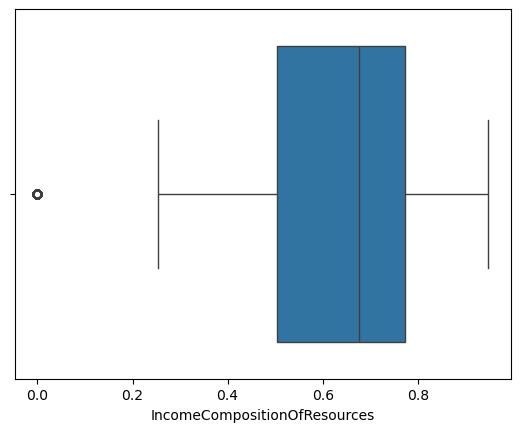

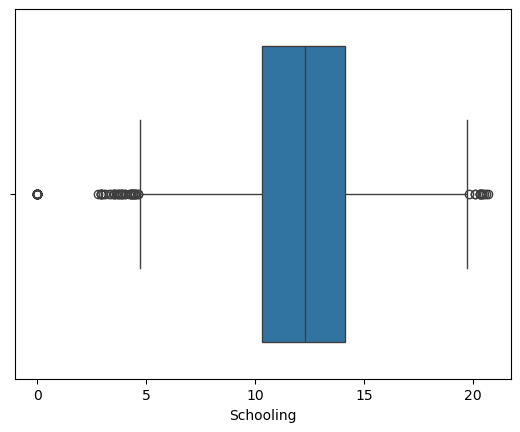

In [103]:
#Detech Outliers using Box plot to identify outliers
columns_values = ['LifeExpectancy', 'AdultMortality', 'InfantDeaths', 'Alcohol','PercentageExpenditure','HepatitisB','Measles','BMI','Under5Deaths','Polio','TotalExpenditure','Diphtheria','HIV/AIDS','GDP','Population','thinnessRate1To19Years','thinnessRate5To9Years','IncomeCompositionOfResources','Schooling']
for i, feature in enumerate(columns_values, 1):
    sns.boxplot(x=df[feature])
    plt.show()

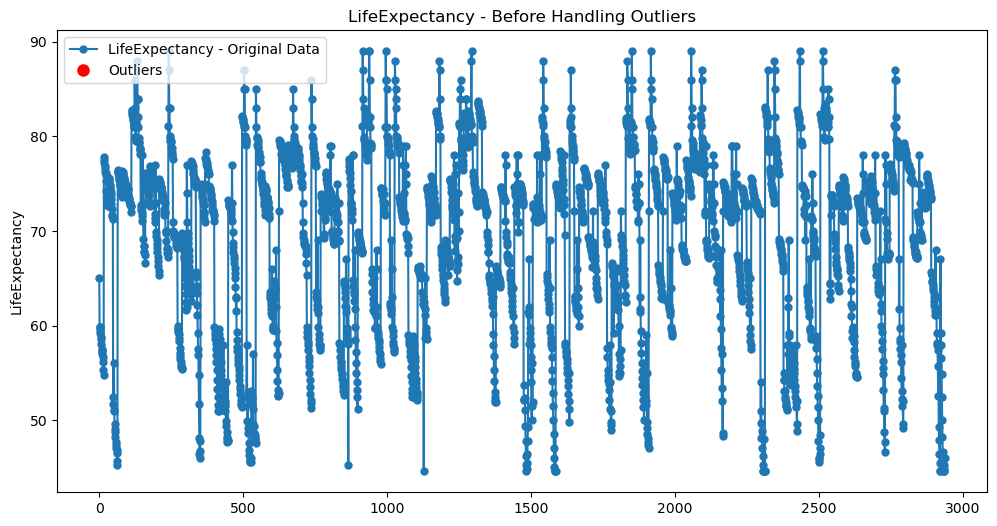

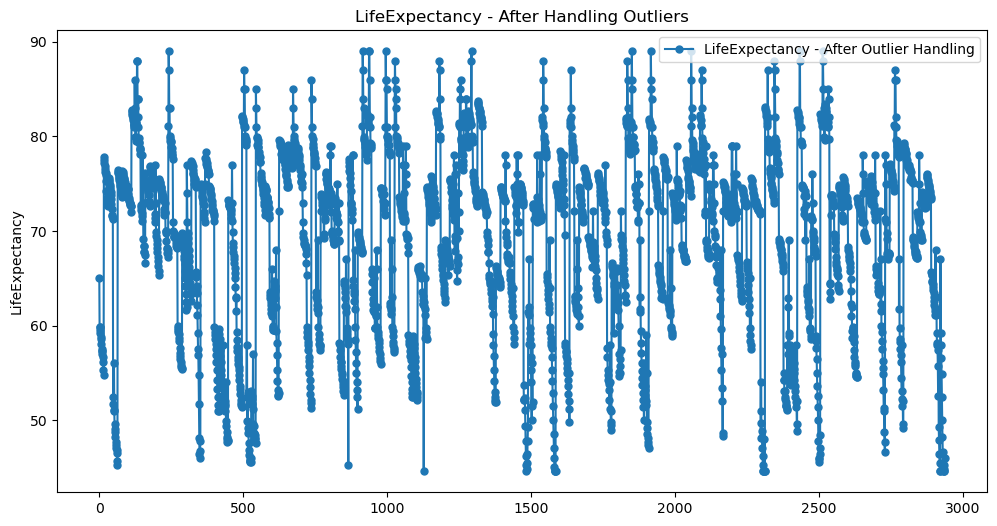

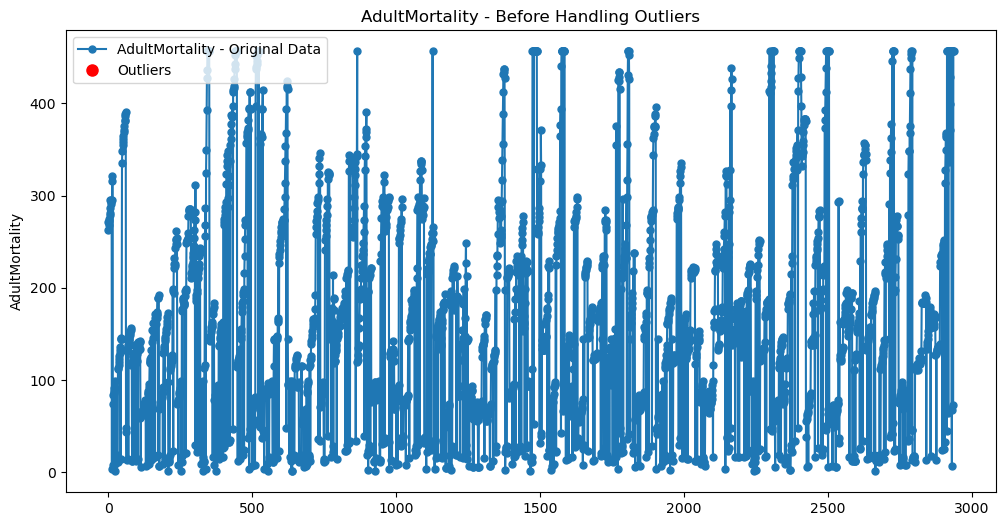

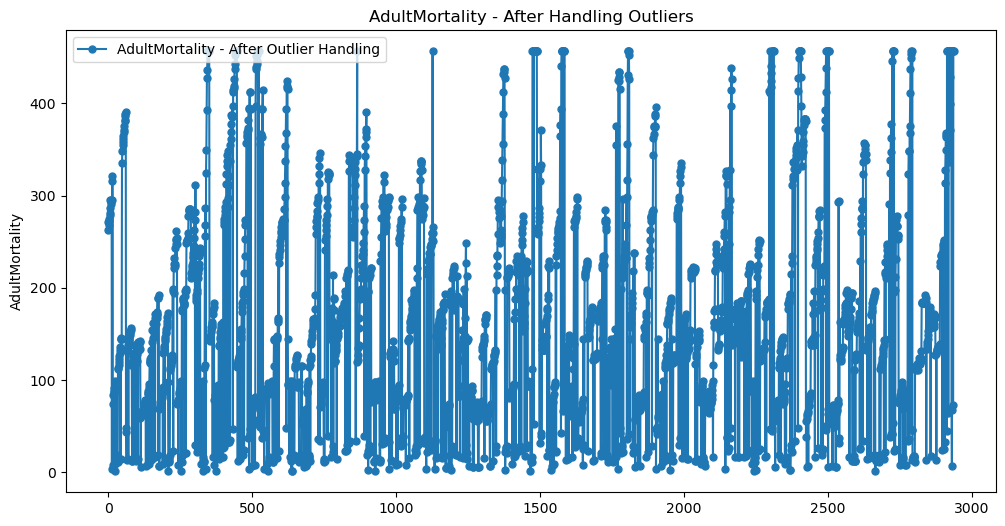

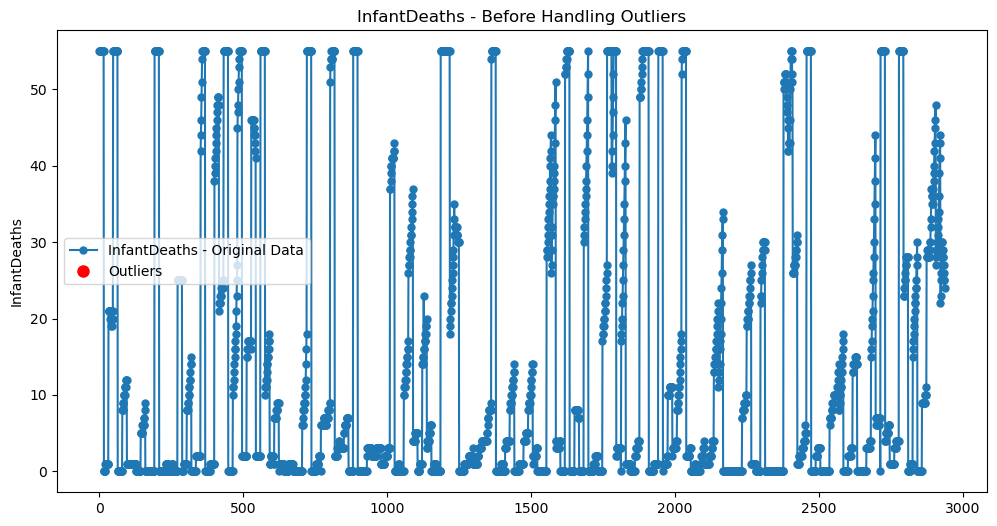

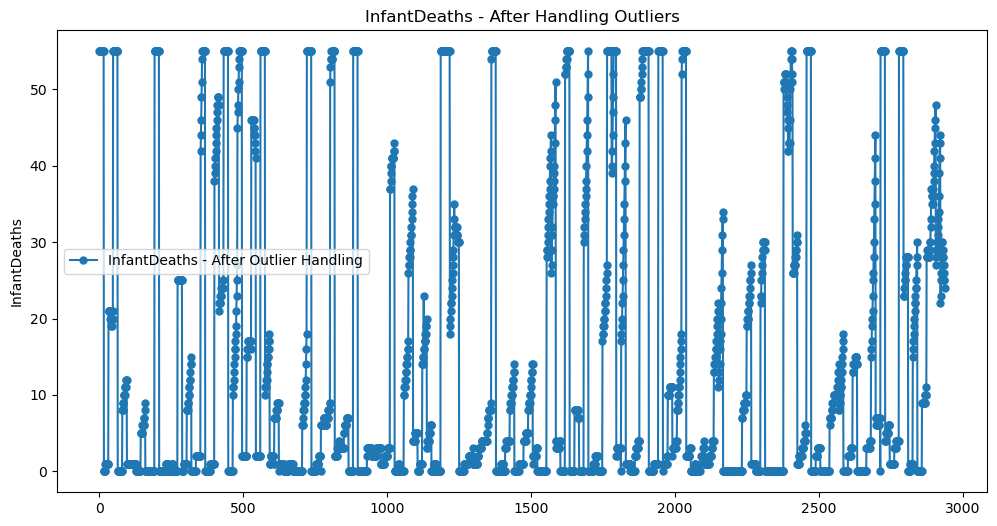

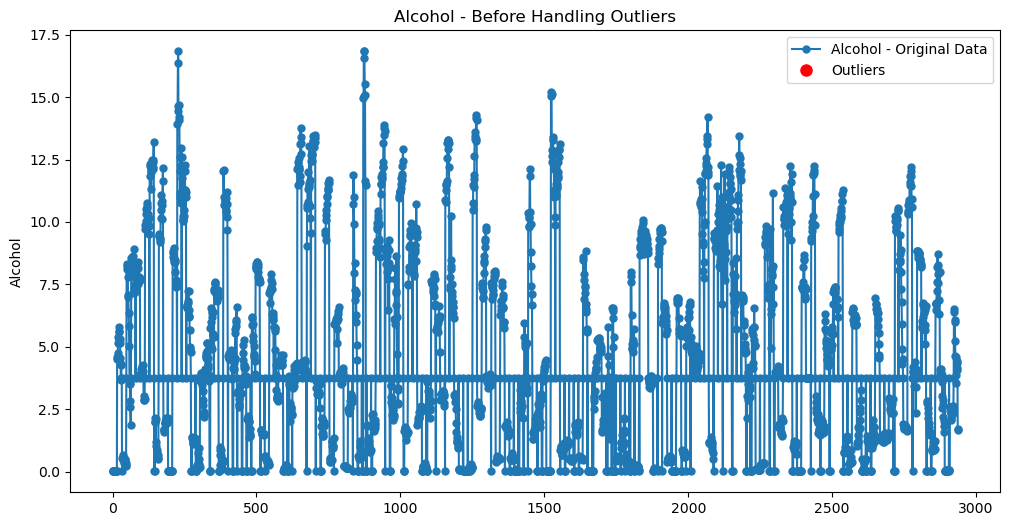

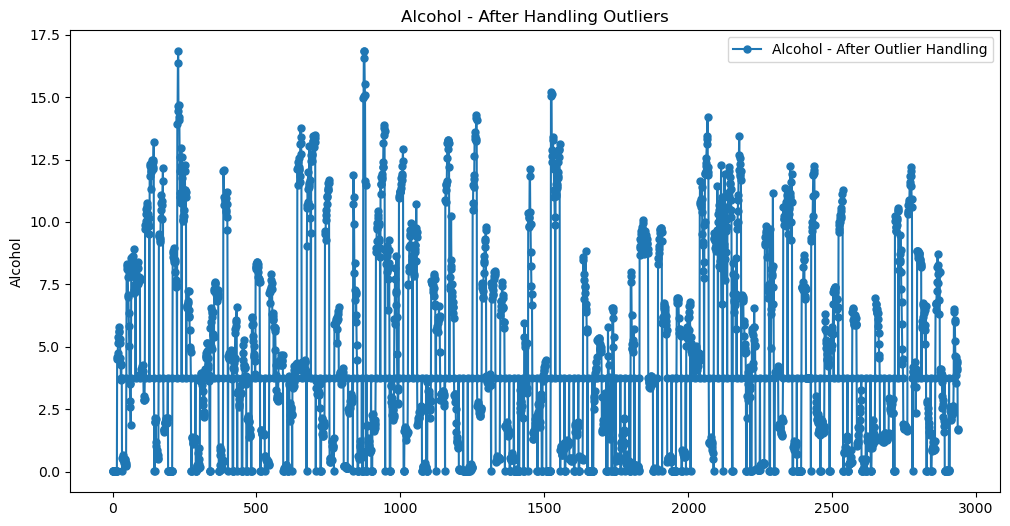

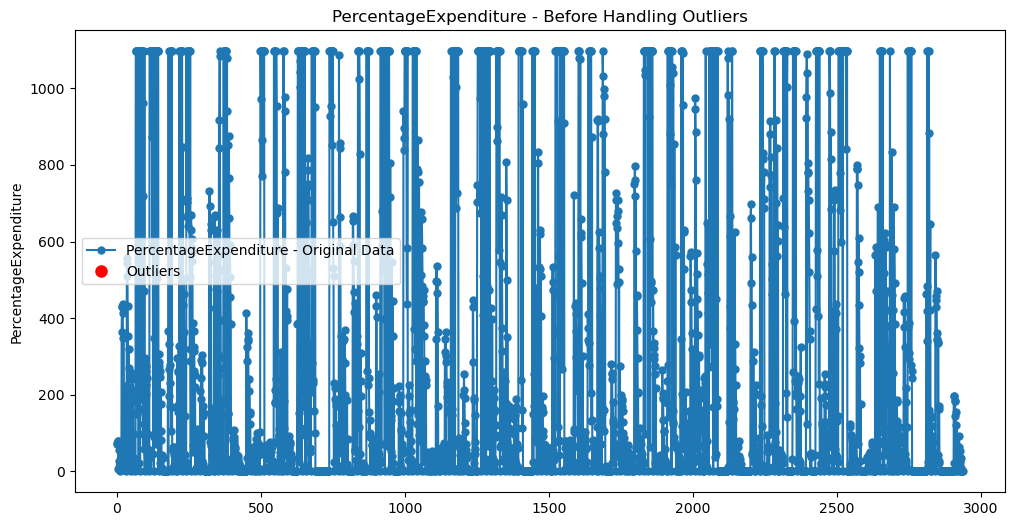

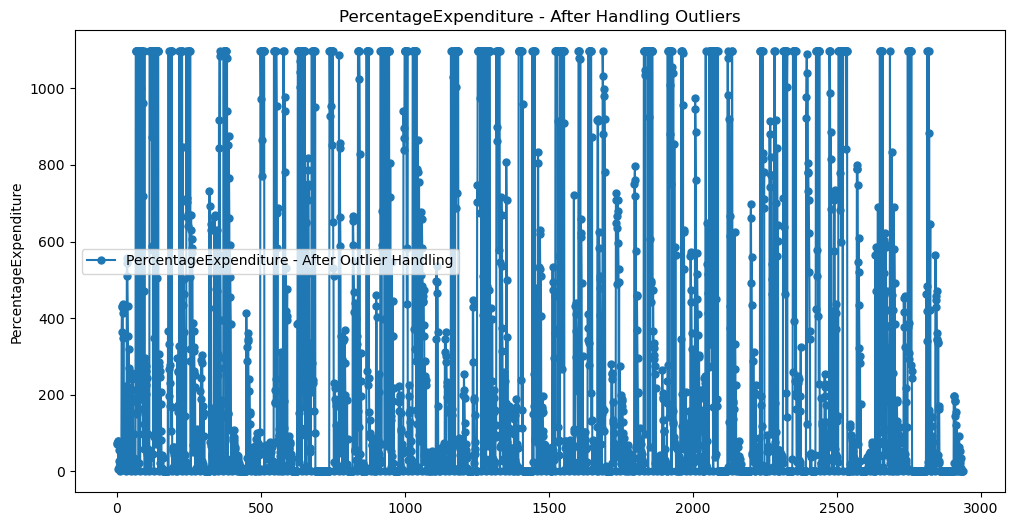

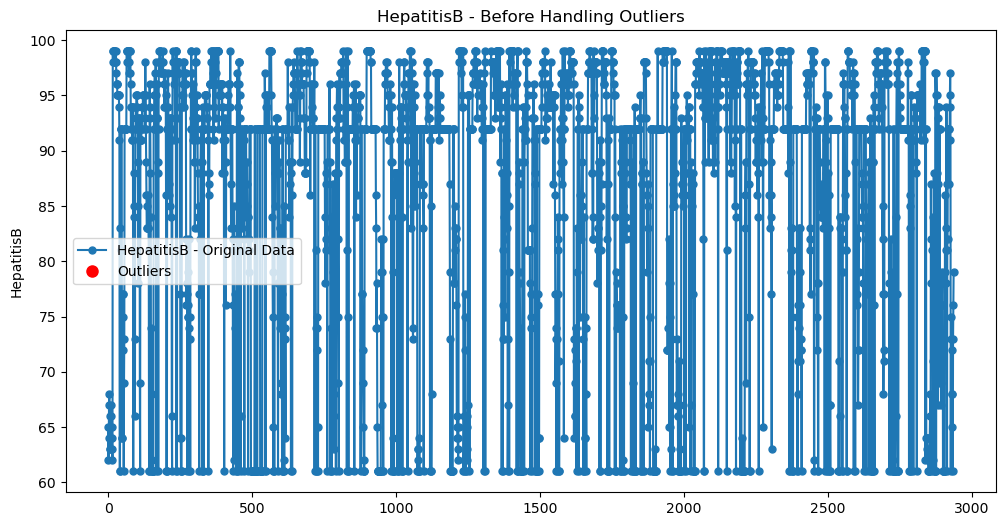

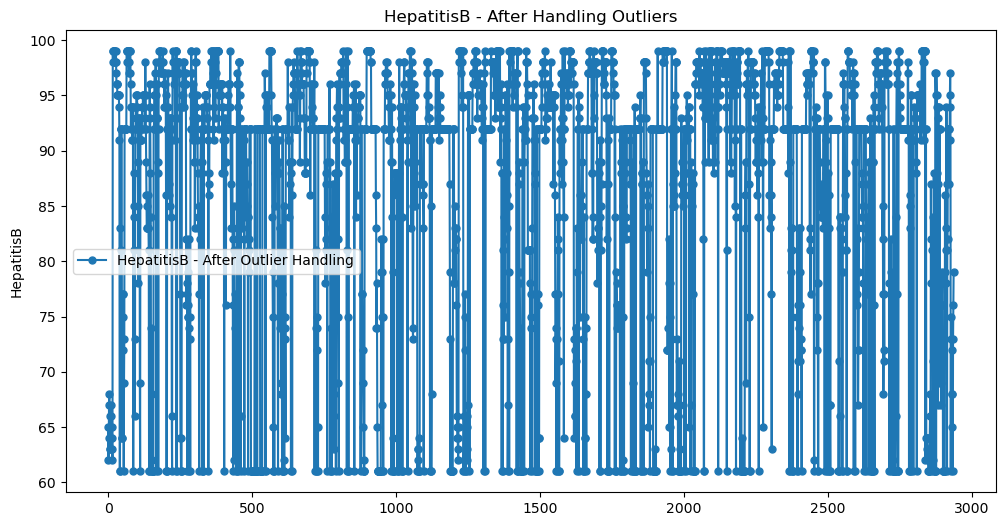

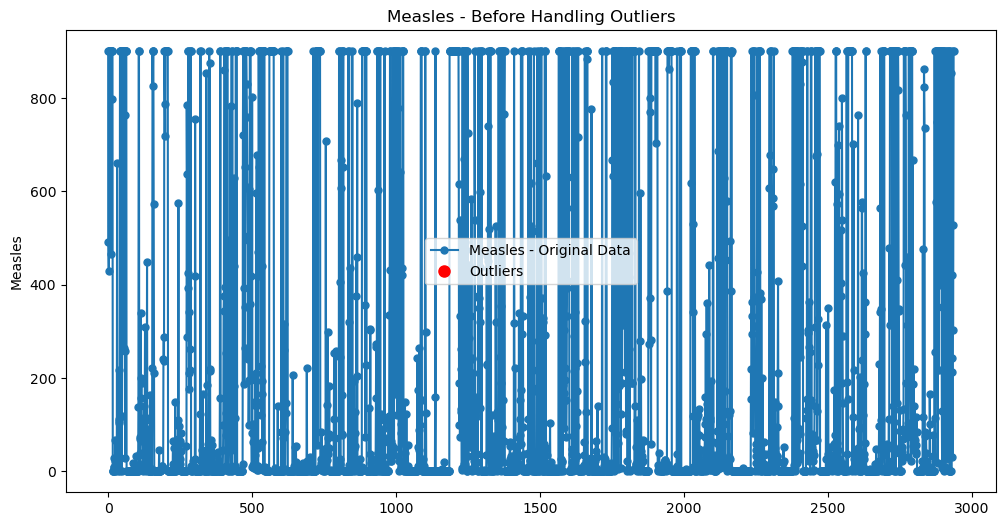

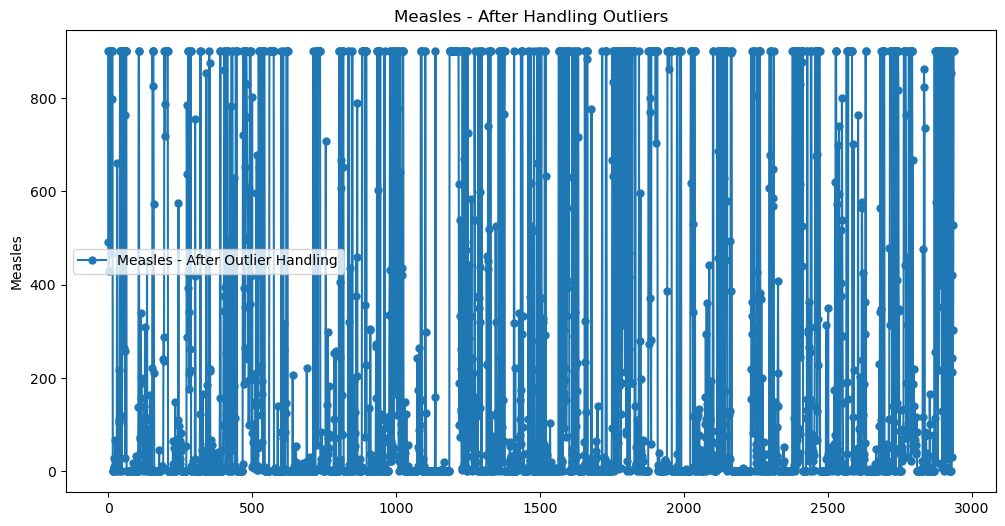

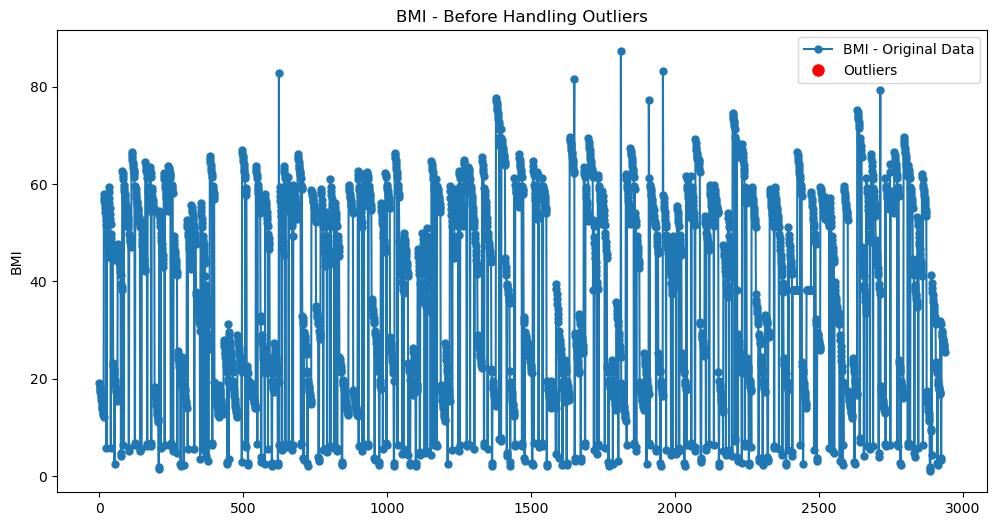

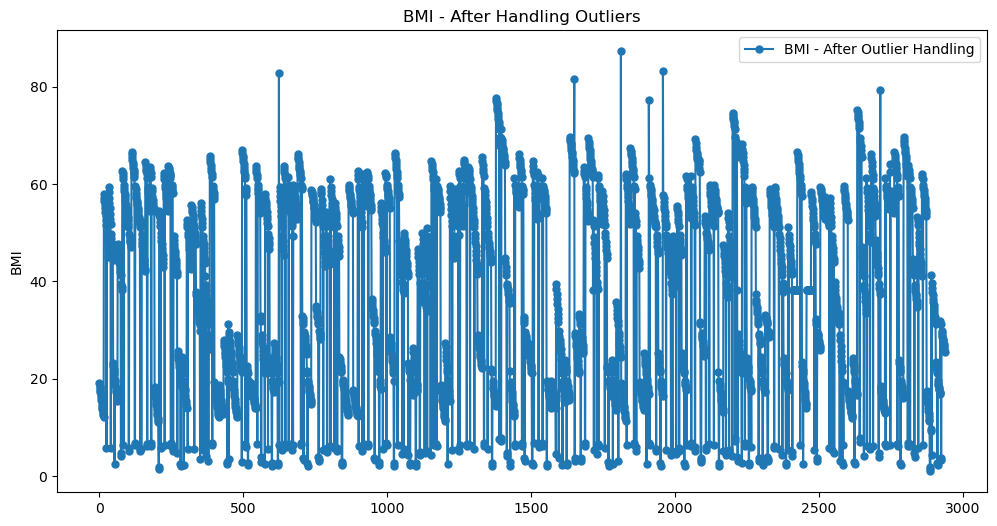

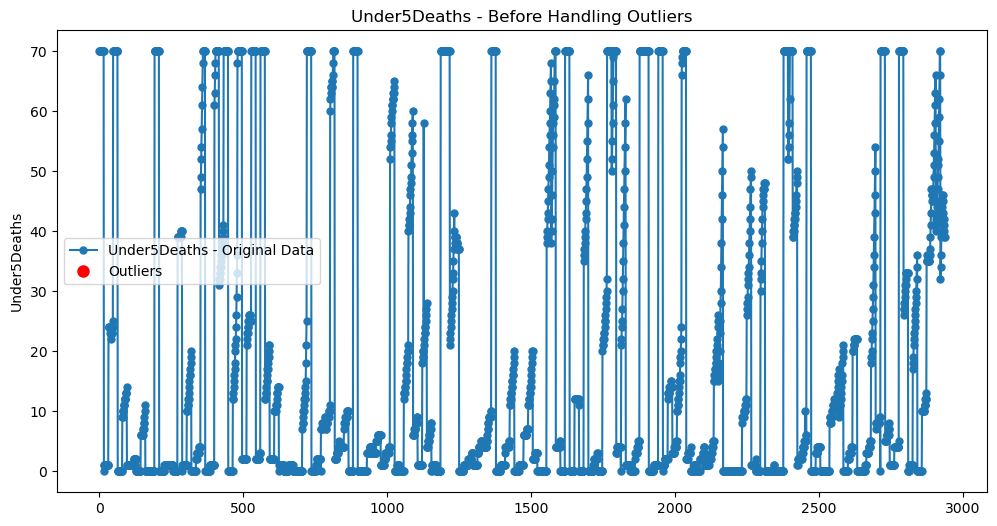

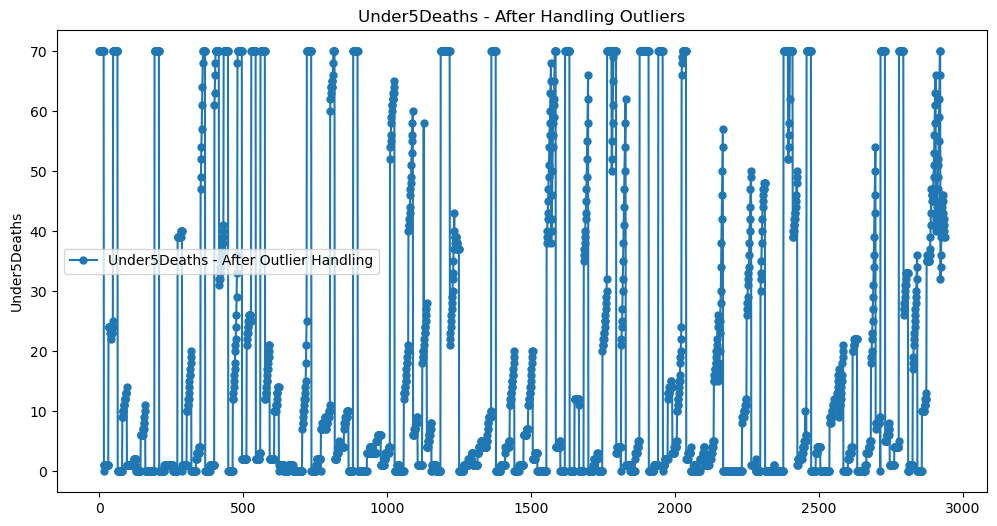

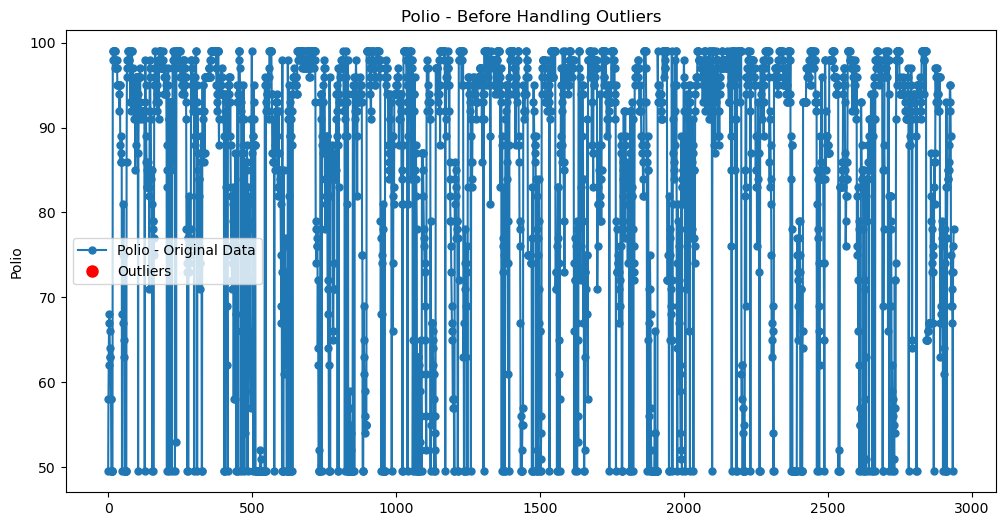

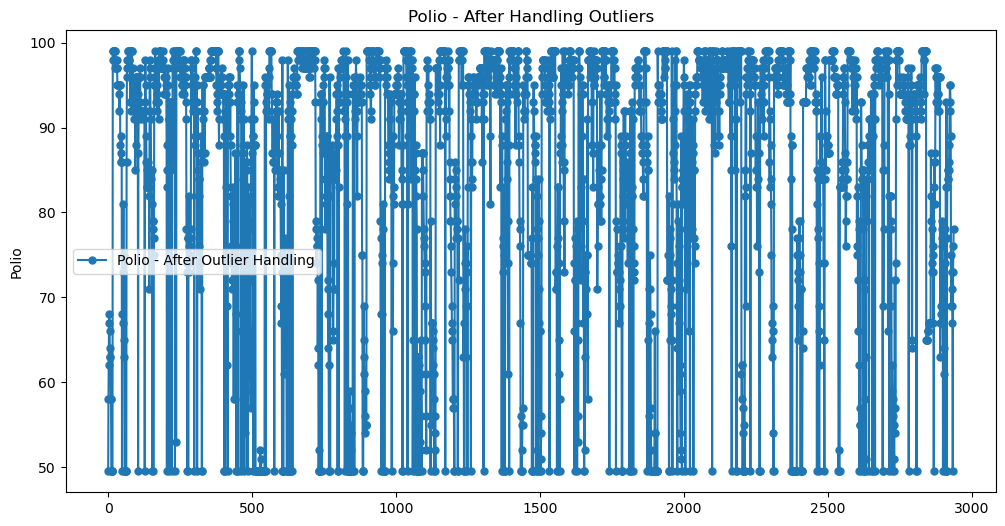

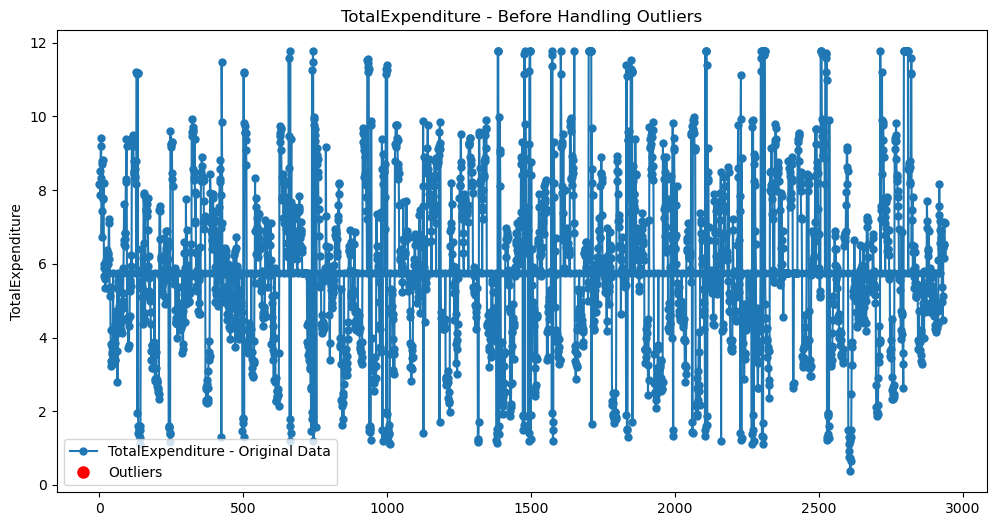

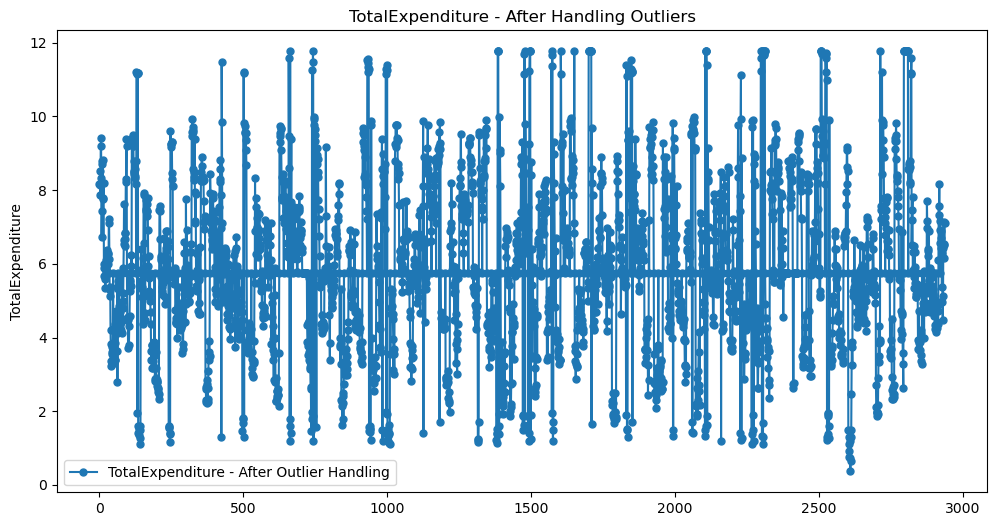

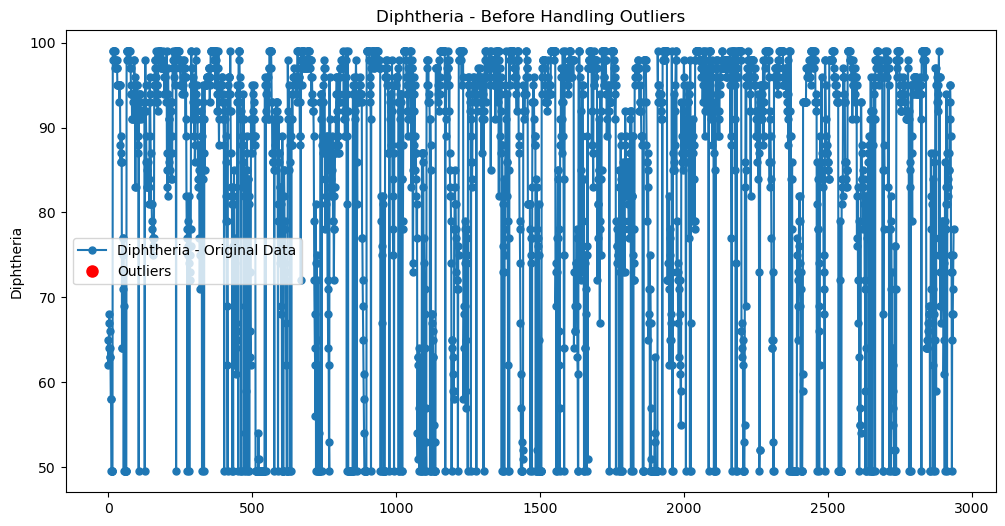

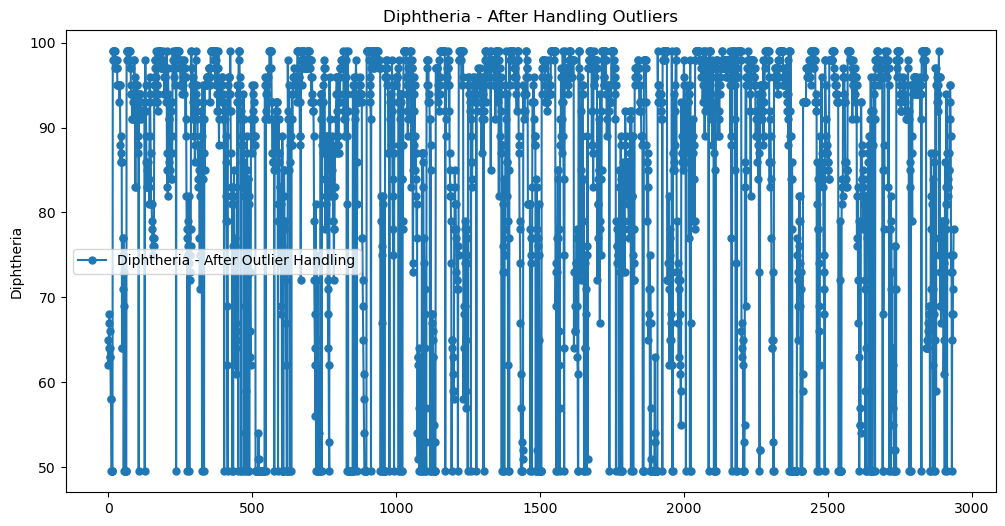

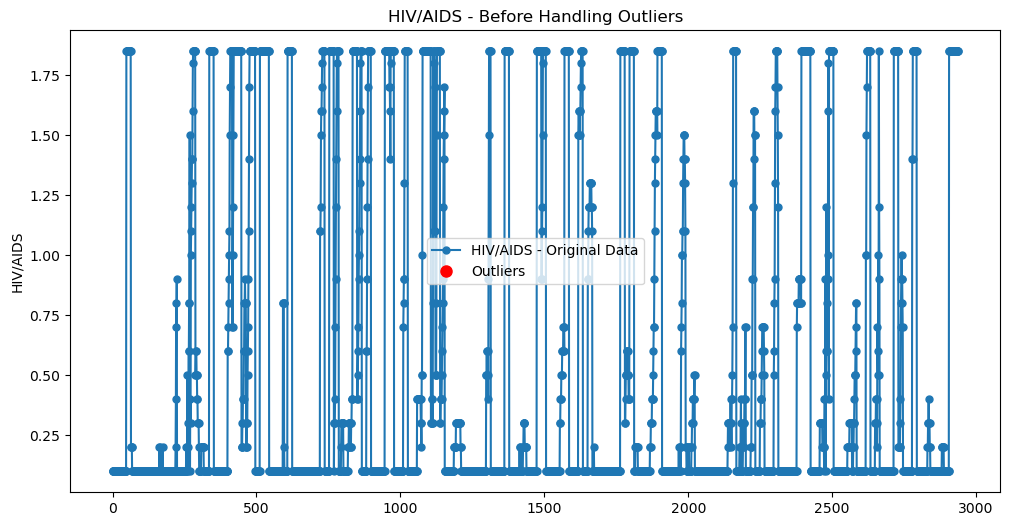

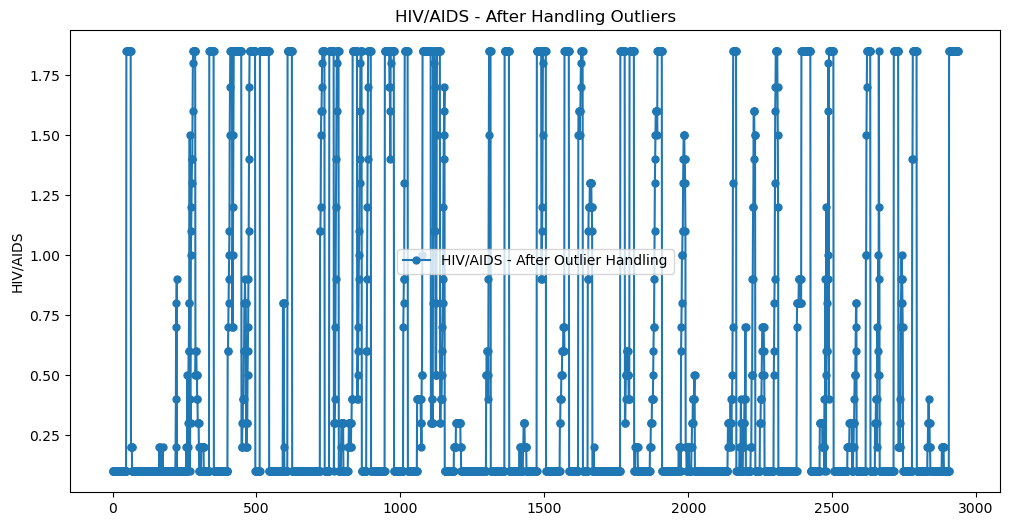

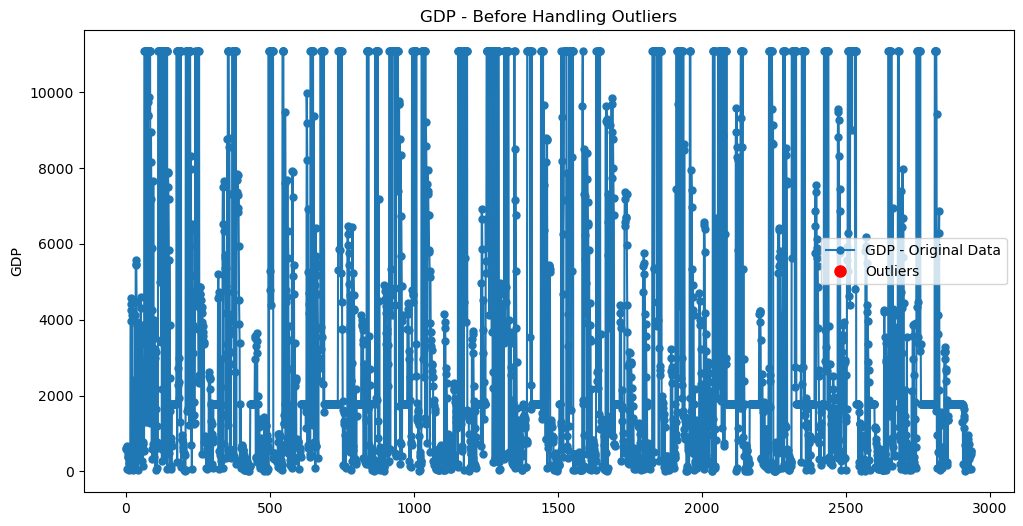

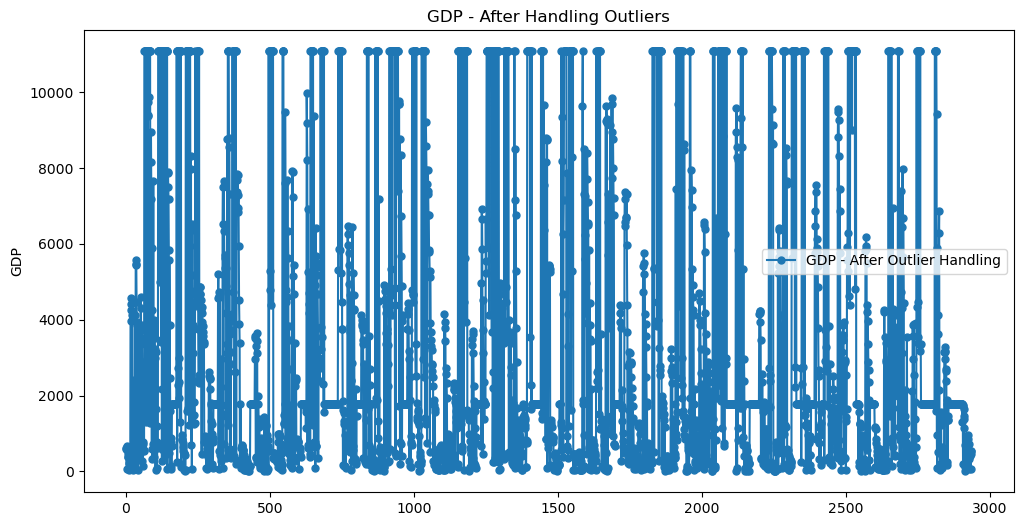

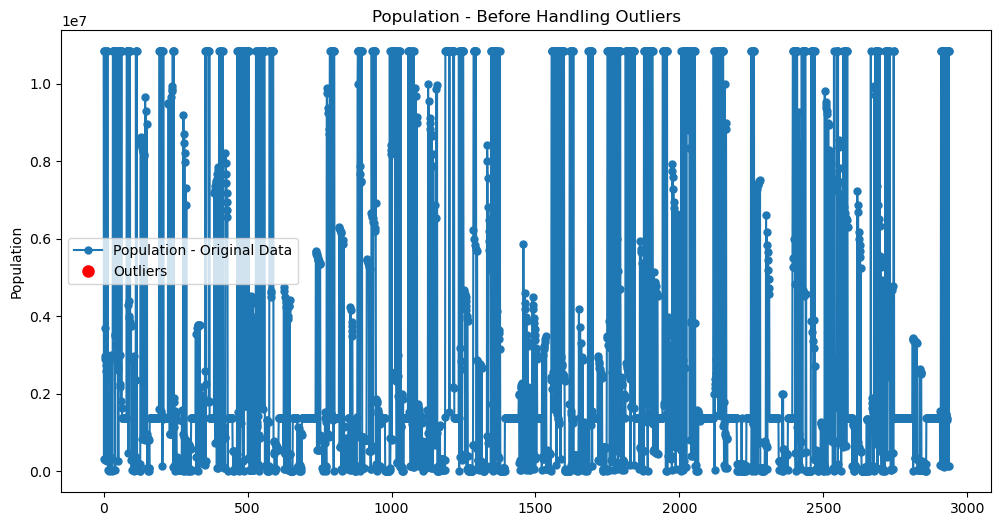

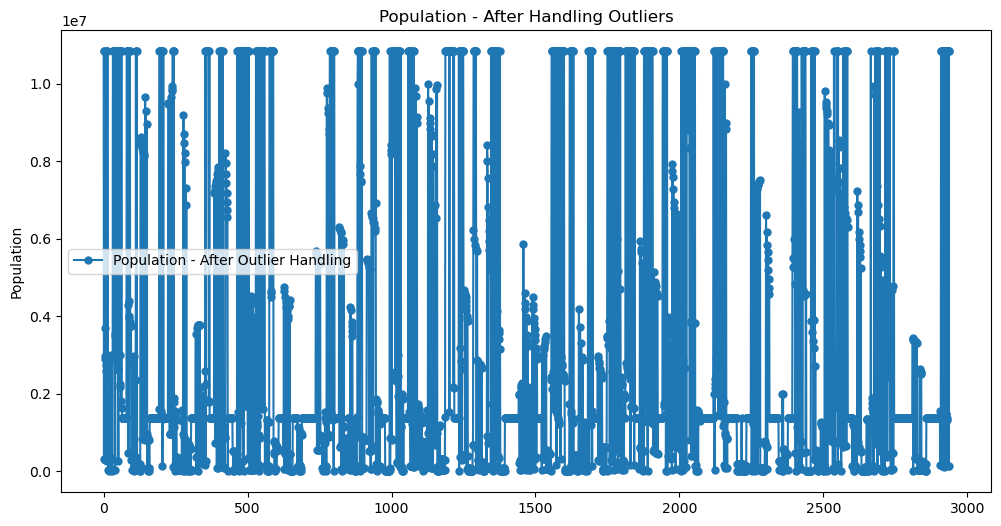

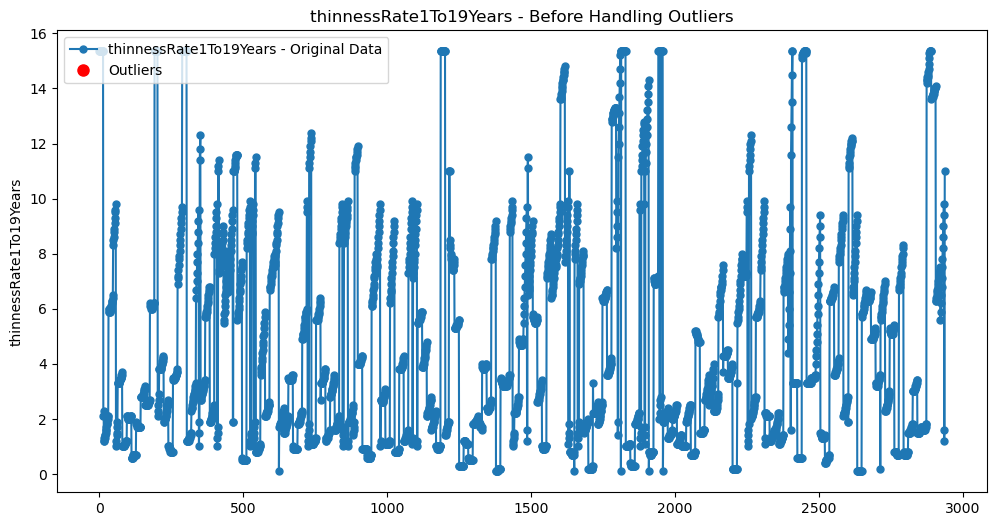

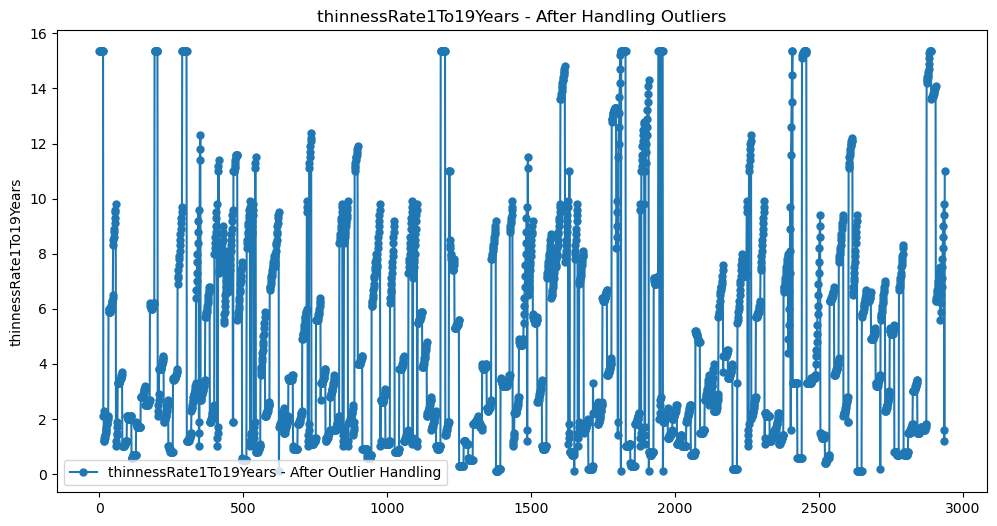

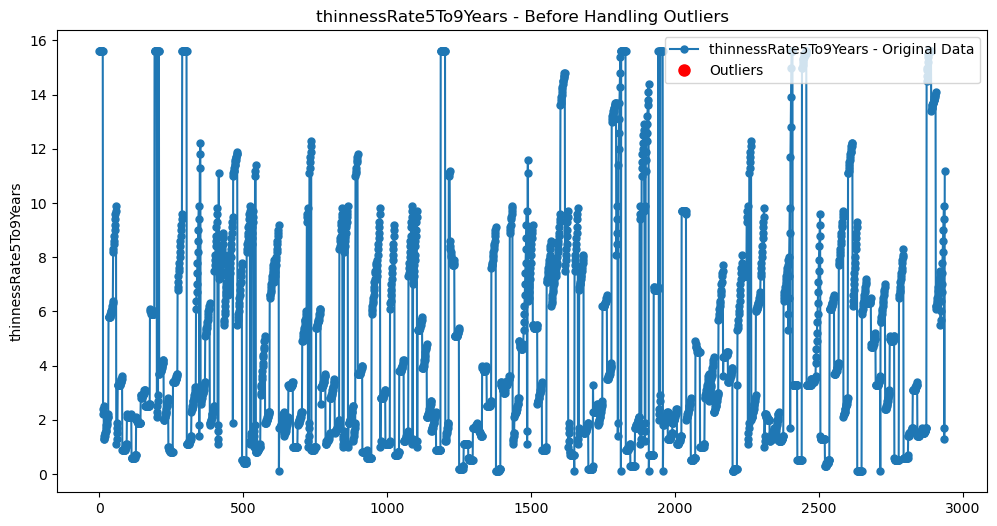

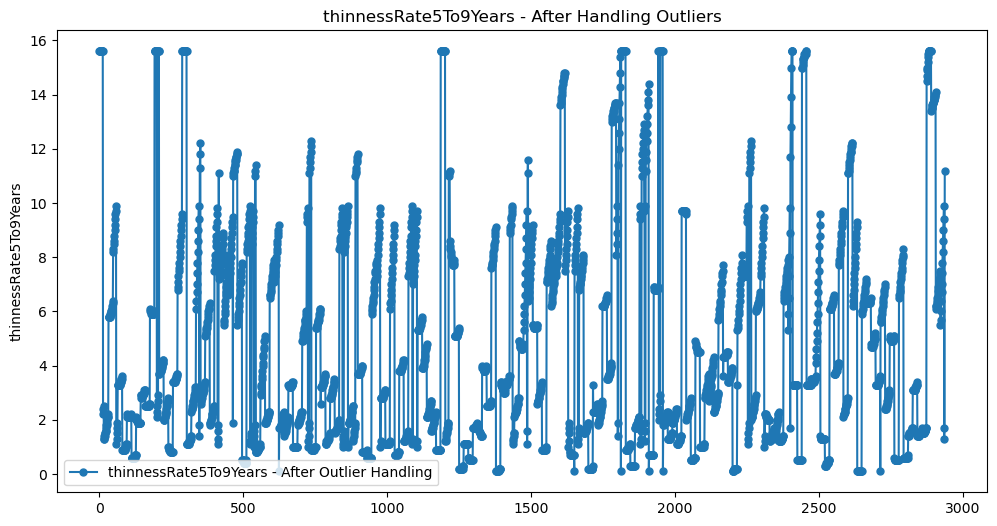

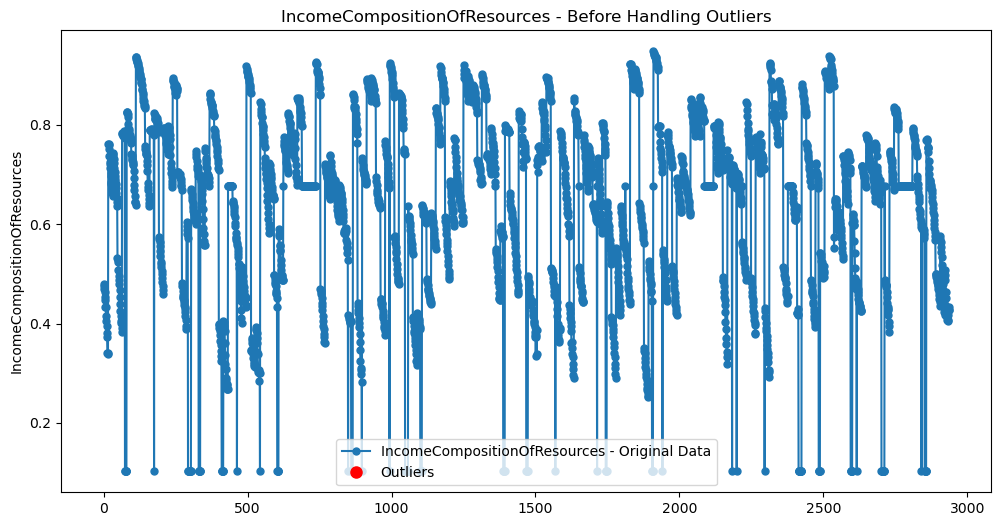

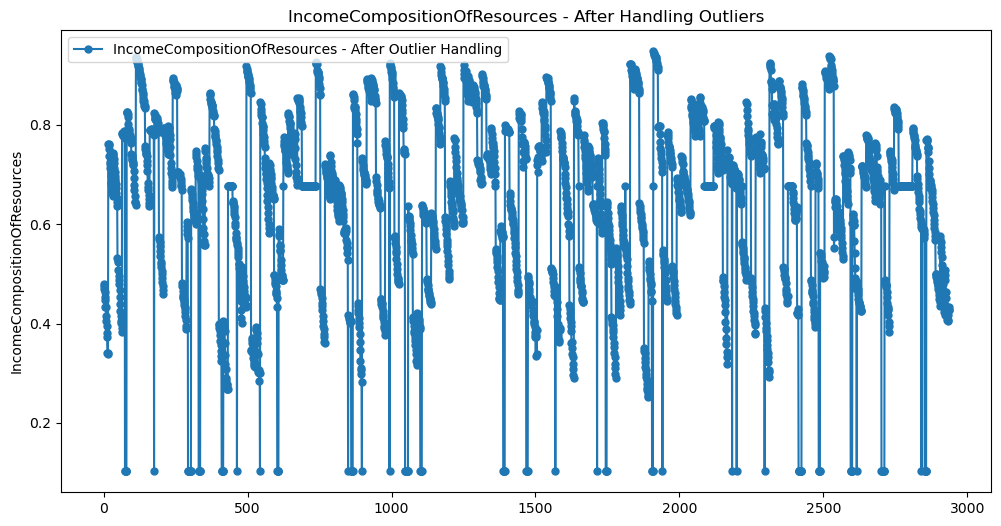

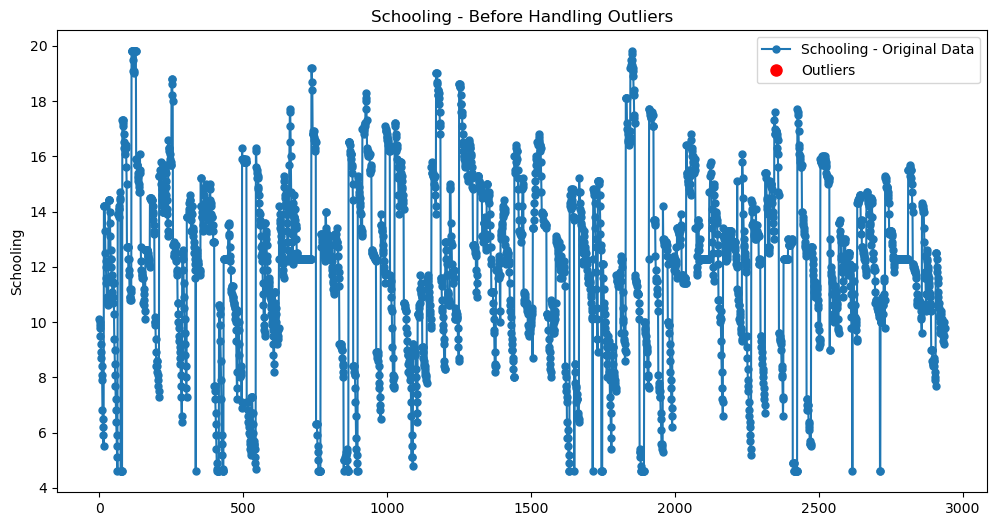

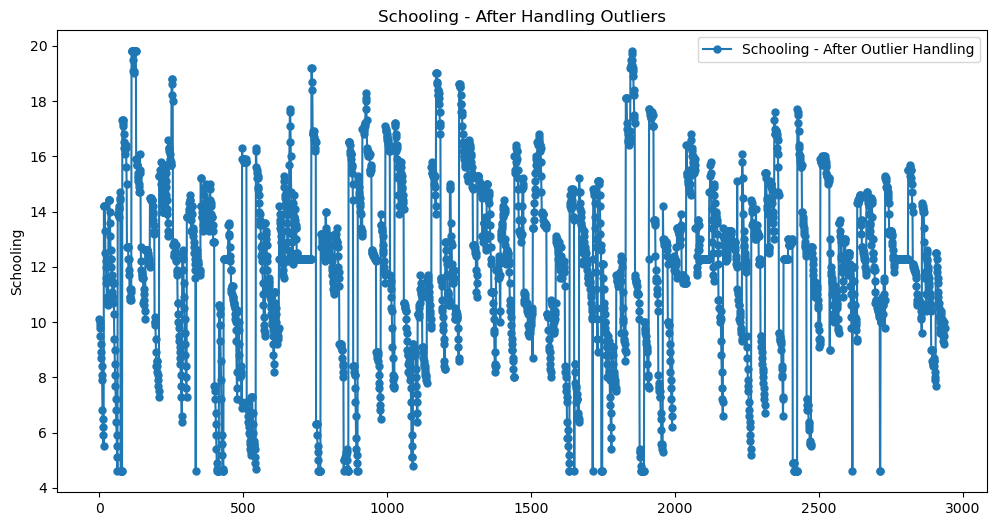

Outlier detection and handling completed for all features.


In [124]:
# List of features to analyze for outliers
features = ['LifeExpectancy', 'AdultMortality', 'InfantDeaths', 'Alcohol','PercentageExpenditure','HepatitisB','Measles','BMI','Under5Deaths','Polio','TotalExpenditure','Diphtheria','HIV/AIDS','GDP','Population','thinnessRate1To19Years','thinnessRate5To9Years','IncomeCompositionOfResources','Schooling']

# Loop through each feature
for feature in features:
    # Calculate IQR to identify anomalies
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify anomalies (outliers)
    df[f'Anomaly_IQR_{feature}'] = (df[feature] < lower_bound) | (df[feature] > upper_bound)
    
    # Plot data before handling outliers
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[feature], label=f'{feature} - Original Data', marker='o', linestyle='-', markersize=5)
    plt.plot(df[df[f'Anomaly_IQR_{feature}']].index, 
             df[df[f'Anomaly_IQR_{feature}']][feature], 
             'ro', markersize=8, label='Outliers')
    plt.ylabel(feature)
    plt.title(f'{feature} - Before Handling Outliers')
    plt.legend()
    plt.show()
    
    # HANDLING OUTLIERS: Clip values to lower and upper bounds
    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)
    
    # Plot data after handling outliers
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[feature], label=f'{feature} - After Outlier Handling', marker='o', linestyle='-', markersize=5)
    plt.ylabel(feature)
    plt.title(f'{feature} - After Handling Outliers')
    plt.legend()
    plt.show()
    
    # Drop the anomaly column after processing
    df = df.drop(columns=[f'Anomaly_IQR_{feature}'])

print("Outlier detection and handling completed for all features.")


In [126]:
# Handle missing values based on skewness: If skewness < 0.5, data will fill with mean, if skewness > 0.5, data will fill with median
columns_missing_values = ['LifeExpectancy', 'Alcohol','BMI','Polio','AdultMortality','Diphtheria','GDP','Population','HepatitisB','Schooling','TotalExpenditure','thinnessRate1To19Years','thinnessRate5To9Years','IncomeCompositionOfResources']

for i, feature in enumerate(columns_missing_values, 1):
    skewness = df[feature].skew()
    print(f"Skewness of Fresh column: {feature}:{skewness}")
   
    if abs(skewness) < 0.5:  
        df[feature] = df[feature].fillna(df[feature].mean())
    else:
        # Use median for skewed distribution
        df[feature] = df[feature].fillna(df[feature].median())

Skewness of Fresh column: LifeExpectancy:-0.6258141148088548
Skewness of Fresh column: Alcohol:0.6463828061263803
Skewness of Fresh column: BMI:-0.220590396710427
Skewness of Fresh column: Polio:-1.237938353665554
Skewness of Fresh column: AdultMortality:0.7733455013988692
Skewness of Fresh column: Diphtheria:-1.2570414565178323
Skewness of Fresh column: GDP:1.1562124943543504
Skewness of Fresh column: Population:1.1919560054583827
Skewness of Fresh column: HepatitisB:-1.1707755742511348
Skewness of Fresh column: Schooling:-0.32062312902155854
Skewness of Fresh column: TotalExpenditure:0.2869686358402244
Skewness of Fresh column: thinnessRate1To19Years:1.0892036535177891
Skewness of Fresh column: thinnessRate5To9Years:1.1058287174213728
Skewness of Fresh column: IncomeCompositionOfResources:-0.9044023436317471


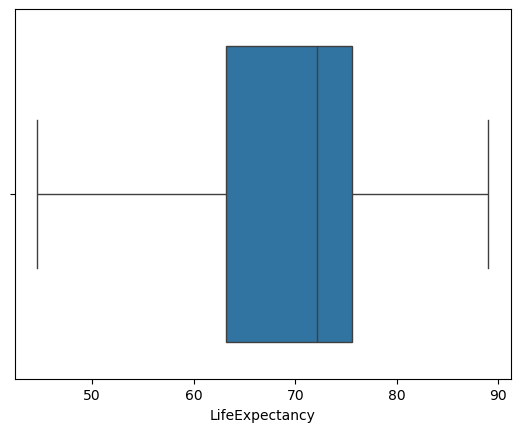

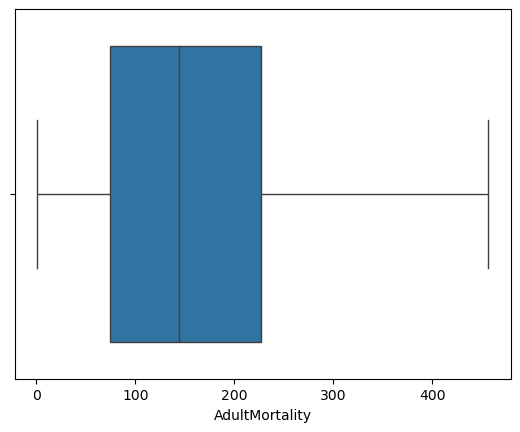

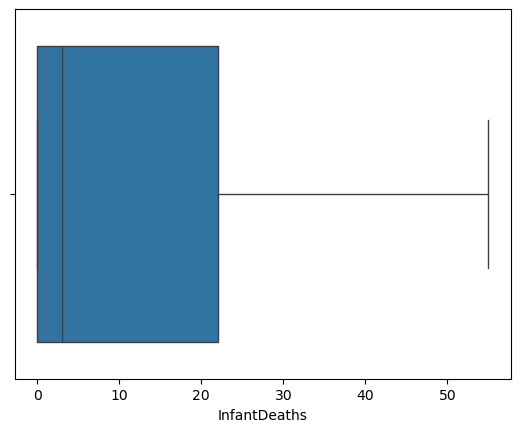

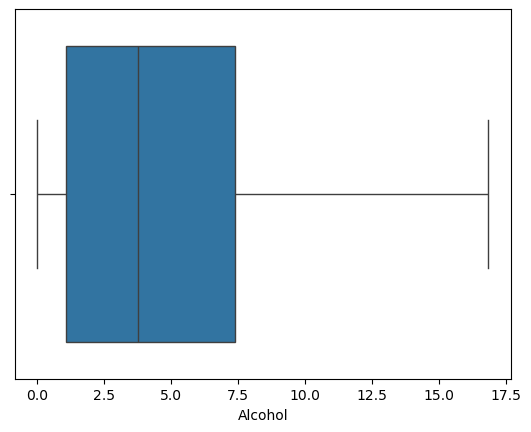

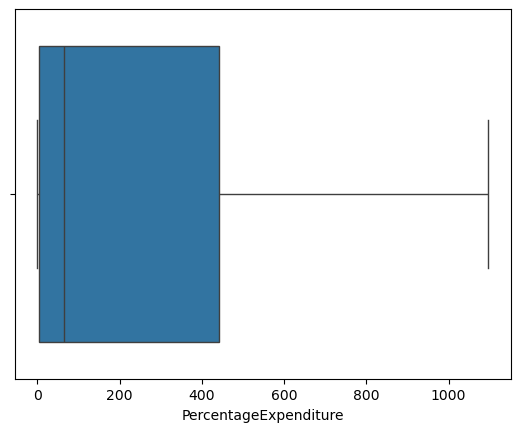

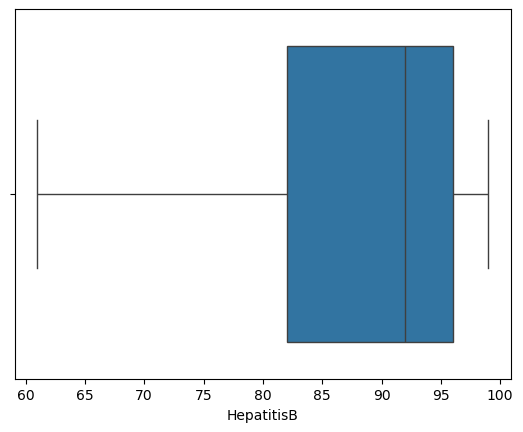

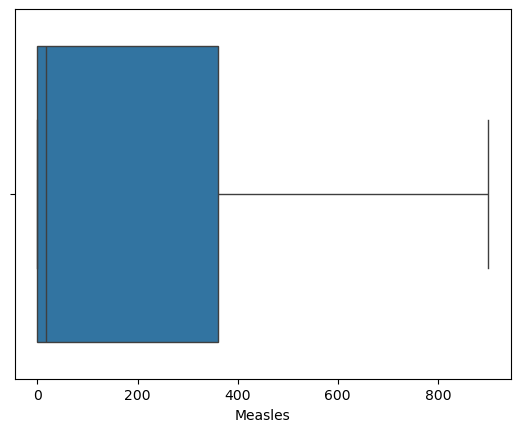

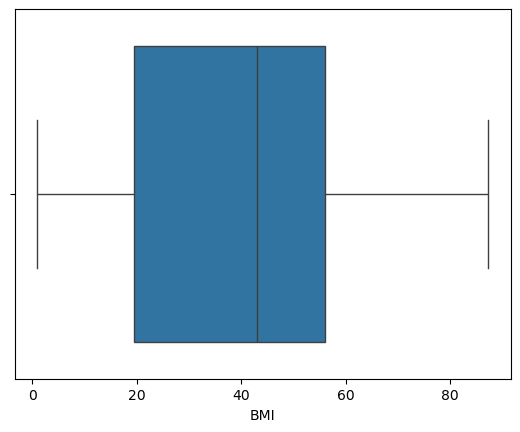

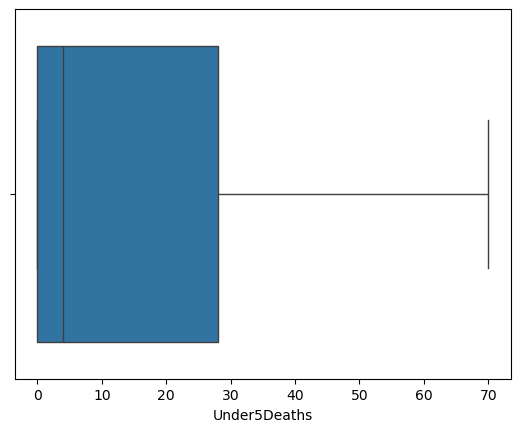

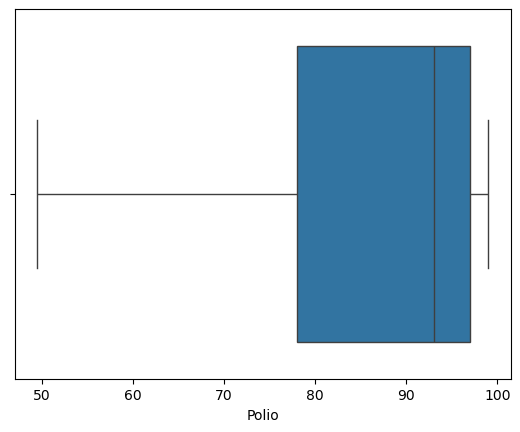

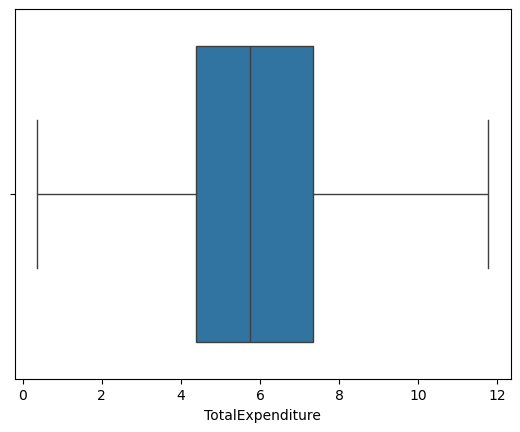

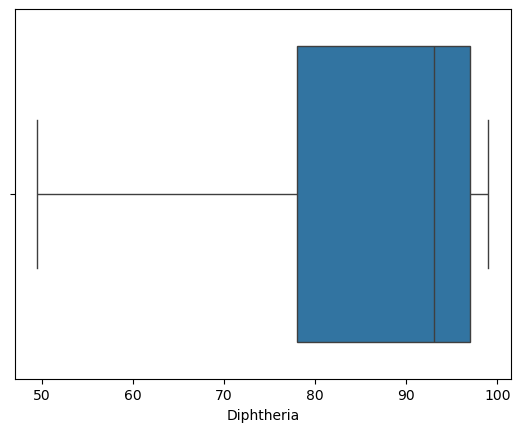

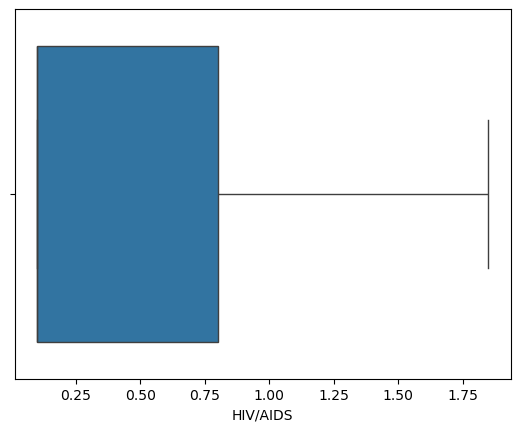

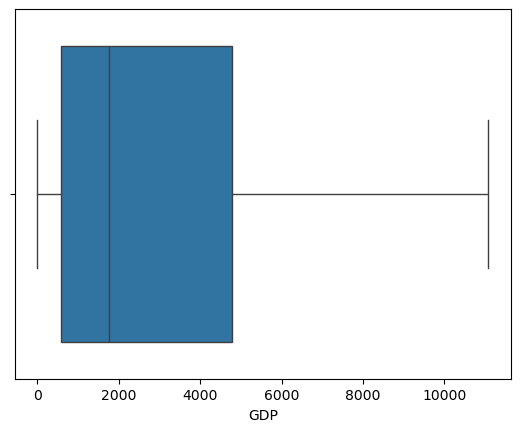

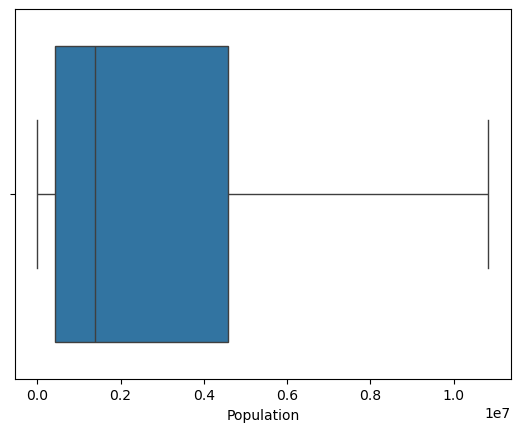

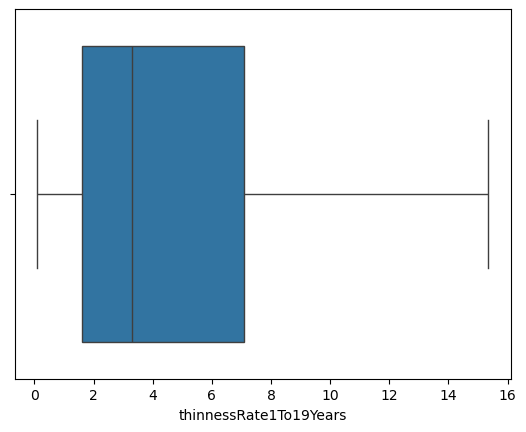

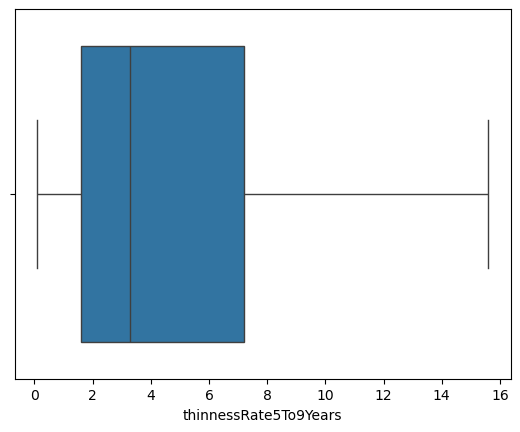

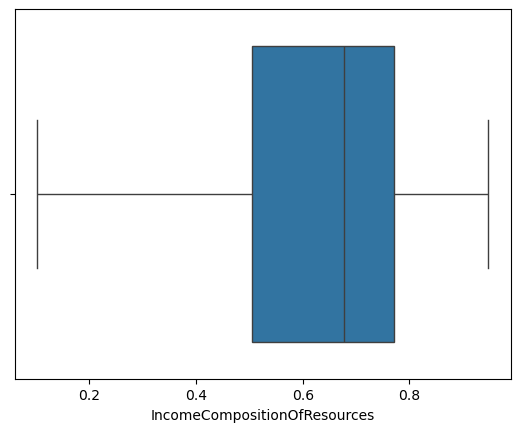

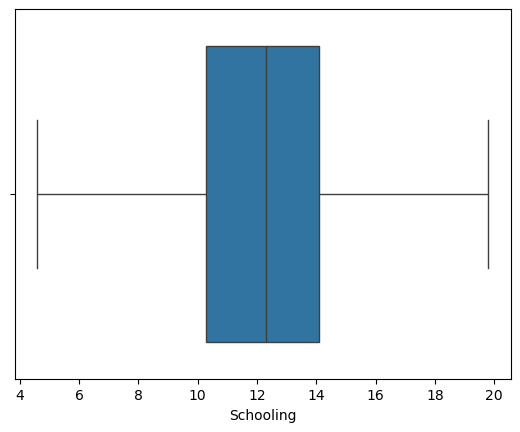

In [128]:
#Detech Outliers using Box plot to identify outliers
columns_values = ['LifeExpectancy', 'AdultMortality', 'InfantDeaths', 'Alcohol','PercentageExpenditure','HepatitisB','Measles','BMI','Under5Deaths','Polio','TotalExpenditure','Diphtheria','HIV/AIDS','GDP','Population','thinnessRate1To19Years','thinnessRate5To9Years','IncomeCompositionOfResources','Schooling']
for i, feature in enumerate(columns_values, 1):
    sns.boxplot(x=df[feature])
    plt.show()

In [107]:
#b: Perform feature scaling or normalization.

In [164]:
# Standardise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaled_df=scaler.fit_transform(encoded_df)
print(scaled_df)

[[ 1.6217623  -0.44776651  0.87509874 ... -0.27745175 -0.26442368
   0.45939851]
 [ 1.40498625 -0.98577141  0.9443815  ... -0.27745175 -0.26442368
   0.45939851]
 [ 1.1882102  -0.98577141  0.91840047 ... -0.27745175 -0.26442368
   0.45939851]
 ...
 [-1.19632639 -2.57868787 -0.77036692 ... -0.27745175 -0.26442368
   0.45939851]
 [-1.41310244 -2.5259423   2.55087561 ... -0.27745175 -0.26442368
   0.45939851]
 [-1.62987849 -2.45209849  2.55087561 ... -0.27745175 -0.26442368
   0.45939851]]


In [156]:
#C: Appropriately encode categorical variables

In [146]:
df['Country'].nunique()

193

In [ ]:
#One-hot encoding method applied for categorical column Status (categorical nominal data) and I used the drop_first=True function to avoid multicollinearity. 
#It generated a single binary column which is Status_developing, while the absence of 1 represents for the developed category.

In [150]:
# The 193 countries in the dataset
country_groups = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Georgia', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Republic of Korea', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'United Arab Emirates', 'Uzbekistan', 'Viet Nam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Republic of Moldova', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia (Federated States of)', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States of America'],
    'South America': ['Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela (Bolivarian Republic of)'],
}

# Create a new column based on the grouping
def group_countries(country):
    for region, countries in country_groups.items():
        if country in countries:
            return region
    return 'Other'  # If country doesn't match any group

# Apply the function and create the 'Region' column
df['Region'] = df['Country'].apply(group_countries)

# Check the result
print(df.head())


       Country  Year      Status  LifeExpectancy  AdultMortality  \
0  Afghanistan  2015  Developing            65.0           263.0   
1  Afghanistan  2014  Developing            59.9           271.0   
2  Afghanistan  2013  Developing            59.9           268.0   
3  Afghanistan  2012  Developing            59.5           272.0   
4  Afghanistan  2011  Developing            59.2           275.0   

   InfantDeaths  Alcohol  PercentageExpenditure  HepatitisB  Measles  ...  \
0            55     0.01              71.279624        65.0  900.625  ...   
1            55     0.01              73.523582        62.0  492.000  ...   
2            55     0.01              73.219243        64.0  430.000  ...   
3            55     0.01              78.184215        67.0  900.625  ...   
4            55     0.01               7.097109        68.0  900.625  ...   

   TotalExpenditure  Diphtheria  HIV/AIDS         GDP   Population  \
0              8.16        65.0       0.1  584.259210  108

In [152]:
#Drop the column of country
df=df.drop(columns=['Country'])
df

Year      Status  LifeExpectancy  AdultMortality  InfantDeaths  Alcohol  \
0     2015  Developing            65.0           263.0            55     0.01   
1     2014  Developing            59.9           271.0            55     0.01   
2     2013  Developing            59.9           268.0            55     0.01   
3     2012  Developing            59.5           272.0            55     0.01   
4     2011  Developing            59.2           275.0            55     0.01   
...    ...         ...             ...             ...           ...      ...   
2933  2004  Developing            44.6           456.5            27     4.36   
2934  2003  Developing            44.6           456.5            26     4.06   
2935  2002  Developing            44.8            73.0            25     4.43   
2936  2001  Developing            45.3           456.5            25     1.72   
2937  2000  Developing            46.0           456.5            24     1.68   

      PercentageExpenditure  HepatitisB  Measles   BMI  ...  TotalExpenditure  \
0                 71.279624        65.0  900.625  19.1  ...              8.16   
1                 73.523582        62.0  492.000  18.6  ...              8.18   
2                 73.219243        64.0  430.000  18.1  ...              8.13   
3                 78.184215        67.0  900.625  17.6  ...              8.52   
4                  7.097109        68.0  900.625  17.2  ...              7.87   
...                     ...         ...      ...   ...  ...               ...   
2933               0.000000        68.0   31.000  27.1  ...              7.13   
2934               0.000000        61.0  900.625  26.7  ...              6.52   
2935               0.000000        73.0  304.000  26.3  ...              6.53   
2936               0.000000        76.0  529.000  25.9  ...              6.16   
2937               0.000000        79.0  900.625  25.5  ...              7.10   

      Diphtheria  HIV/AIDS         GDP   Population  thinnessRate1To19Years  \
0           65.0      0.10  584.259210  10832552.25                   15.35   
1           62.0      0.10  612.696514    327582.00                   15.35   
2           64.0      0.10  631.744976  10832552.25                   15.35   
3           67.0      0.10  669.959000   3696958.00                   15.35   
4           68.0      0.10   63.537231   2978599.00                   15.35   
...          ...       ...         ...          ...                     ...   
2933        65.0      1.85  454.366654  10832552.25                    9.40   
2934        68.0      1.85  453.351155  10832552.25                    9.80   
2935        71.0      1.85   57.348340    125525.00                    1.20   
2936        75.0      1.85  548.587312  10832552.25                    1.60   
2937        78.0      1.85  547.358878  10832552.25                   11.00   

      thinnessRate5To9Years  IncomeCompositionOfResources  Schooling  Region  
0                      15.6                         0.479       10.1    Asia  
1                      15.6                         0.476       10.0    Asia  
2                      15.6                         0.470        9.9    Asia  
3                      15.6                         0.463        9.8    Asia  
4                      15.6                         0.454        9.5    Asia  
...                     ...                           ...        ...     ...  
2933                    9.4                         0.407        9.2  Africa  
2934                    9.9                         0.418        9.5  Africa  
2935                    1.3                         0.427       10.0  Africa  
2936                    1.7                         0.427        9.8  Africa  
2937                   11.2                         0.434        9.8  Africa  

[2938 rows x 22 columns]

In [158]:
#One-hot encoding for categerical column 'Status'
encoded_df=pd.get_dummies(df,columns=['Region','Status'],drop_first=True)
#Convert boolean columns to integers
for column in encoded_df.select_dtypes(include=['bool']).columns:
    encoded_df[column]=encoded_df[column].astype(int)
encoded_df

Year  LifeExpectancy  AdultMortality  InfantDeaths  Alcohol  \
0     2015            65.0           263.0            55     0.01   
1     2014            59.9           271.0            55     0.01   
2     2013            59.9           268.0            55     0.01   
3     2012            59.5           272.0            55     0.01   
4     2011            59.2           275.0            55     0.01   
...    ...             ...             ...           ...      ...   
2933  2004            44.6           456.5            27     4.36   
2934  2003            44.6           456.5            26     4.06   
2935  2002            44.8            73.0            25     4.43   
2936  2001            45.3           456.5            25     1.72   
2937  2000            46.0           456.5            24     1.68   

      PercentageExpenditure  HepatitisB  Measles   BMI  Under5Deaths  ...  \
0                 71.279624        65.0  900.625  19.1            70  ...   
1                 73.523582        62.0  492.000  18.6            70  ...   
2                 73.219243        64.0  430.000  18.1            70  ...   
3                 78.184215        67.0  900.625  17.6            70  ...   
4                  7.097109        68.0  900.625  17.2            70  ...   
...                     ...         ...      ...   ...           ...  ...   
2933               0.000000        68.0   31.000  27.1            42  ...   
2934               0.000000        61.0  900.625  26.7            41  ...   
2935               0.000000        73.0  304.000  26.3            40  ...   
2936               0.000000        76.0  529.000  25.9            39  ...   
2937               0.000000        79.0  900.625  25.5            39  ...   

      thinnessRate5To9Years  IncomeCompositionOfResources  Schooling  \
0                      15.6                         0.479       10.1   
1                      15.6                         0.476       10.0   
2                      15.6                         0.470        9.9   
3                      15.6                         0.463        9.8   
4                      15.6                         0.454        9.5   
...                     ...                           ...        ...   
2933                    9.4                         0.407        9.2   
2934                    9.9                         0.418        9.5   
2935                    1.3                         0.427       10.0   
2936                    1.7                         0.427        9.8   
2937                   11.2                         0.434        9.8   

      Region_Asia  Region_Europe  Region_North America  Region_Oceania  \
0               1              0                     0               0   
1               1              0                     0               0   
2               1              0                     0               0   
3               1              0                     0               0   
4               1              0                     0               0   
...           ...            ...                   ...             ...   
2933            0              0                     0               0   
2934            0              0                     0               0   
2935            0              0                     0               0   
2936            0              0                     0               0   
2937            0              0                     0               0   

      Region_Other  Region_South America  Status_Developing  
0                0                     0                  1  
1                0                     0                  1  
2                0                     0                  1  
3                0                     0                  1  
4                0                     0                  1  
...            ...                   ...                ...  
2933             0                     0                  1  
29

In [ ]:
df.shape

In [ ]:
encoded_df.shape

In [ ]:
#d: Split the dataset into training and testing sets.

In [160]:
# Features (all columns except 'LifeExpectancy')
X = encoded_df.drop("LifeExpectancy", axis=1)  

# Target the column 'diabets'
y = encoded_df["LifeExpectancy"]  
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [162]:
# Output the shapes of the split datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2350, 26)
X_test shape: (588, 26)
y_train shape: (2350,)
y_test shape: (588,)


In [ ]:
#PARTA - TASK2: MODEL BUILDING WITH HYPER-PARAMETER TUNING

In [ ]:
# a: Choose any regression model to predict the target variable

In [166]:
# Instantiate the Linear Regression model
linear_model = LinearRegression()
# Train the model on the training dataset
linear_model.fit(X_train, y_train)
 
# Predict the target variable for the test dataset
y_pred_linear = linear_model.predict(X_test)
# Evaluate the model's performance
linear_mse = mean_squared_error(y_test, y_pred_linear)  # Mean Squared Error
linear_r2 = r2_score(y_test, y_pred_linear)  # R^2 Score
linear_rmse = np.sqrt(linear_mse) # RMSE for Linear Regression
 
print("Linear Regression Results:")
print(f"Root Mean Squared Error (RMSE): {linear_rmse:.2f}")
print(f"Mean Squared Error (MSE): {linear_mse:.2f}")
print(f"R^2 Score: {linear_r2:.2f}")

Linear Regression Results:
Root Mean Squared Error (RMSE): 3.43
Mean Squared Error (MSE): 11.76
R^2 Score: 0.86


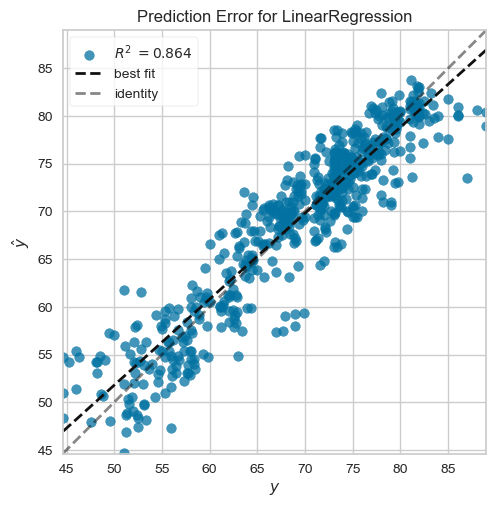

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [170]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
v=PredictionError(linear_model).fit(X_train,y_train)
v.score(X_test,y_test)
v.poof()

In [174]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
 
# Evaluation
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)  # Calculating RMSE
r2 = r2_score(y_test, y_pred_ridge)
 
print("Ridge Regression")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")  # Printing RMSE
print(f"R-squared: {r2:.2f}")
print("Coefficients:", [f"{coef:.2f}" for coef in ridge.coef_]) 

Ridge Regression
MSE: 11.75
RMSE: 3.43
R-squared: 0.86
Coefficients: ['0.55', '-1.74', '4.74', '-0.29', '0.72', '-0.48', '0.20', '0.01', '-6.17', '0.50', '-0.03', '0.64', '-3.21', '-0.15', '0.20', '0.02', '-0.45', '1.29', '0.76', '0.35', '0.30', '1.12', '-0.12', '-0.19', '0.43', '-1.25']


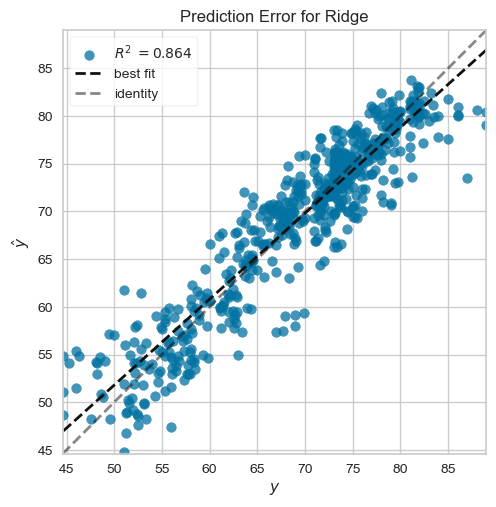

<Axes: title={'center': 'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [176]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
v=PredictionError(ridge).fit(X_train,y_train)
v.score(X_test,y_test)
v.poof()

In [178]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
 
# Evaluation
print("\nLasso Regression")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_lasso):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}")
print(f"Coefficients: {[f'{coef:.2f}' for coef in lasso.coef_]}")


Lasso Regression
MSE: 12.01
R-squared: 0.86
RMSE: 3.47
Coefficients: ['0.41', '-1.78', '-0.00', '-0.00', '0.55', '-0.30', '0.00', '0.01', '-1.15', '0.39', '0.00', '0.59', '-3.55', '0.00', '0.13', '-0.00', '-0.32', '1.51', '0.72', '0.14', '0.00', '0.87', '-0.07', '-0.14', '0.22', '-1.03']


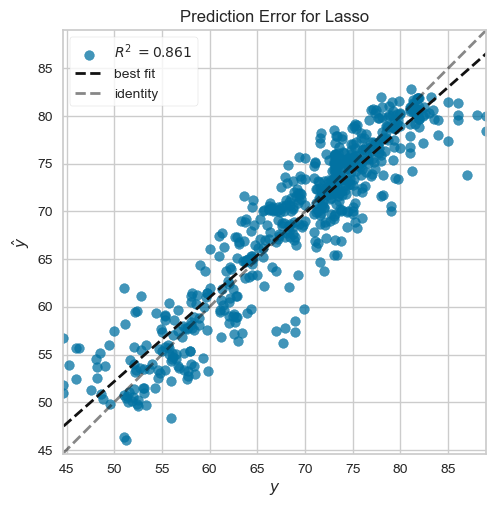

<Axes: title={'center': 'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [180]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
v=PredictionError(lasso).fit(X_train,y_train)
v.score(X_test,y_test)
v.poof()

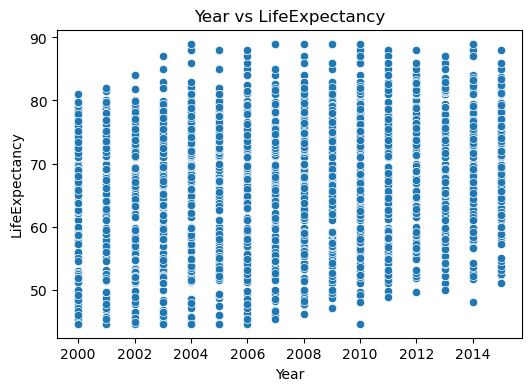

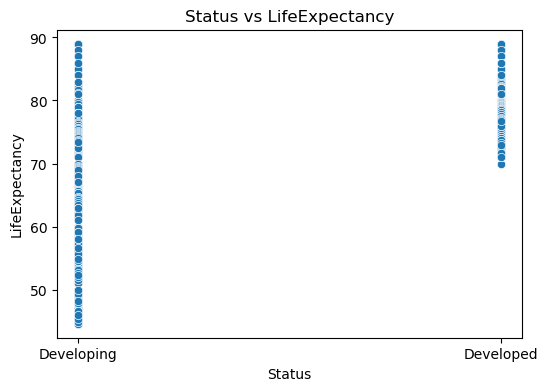

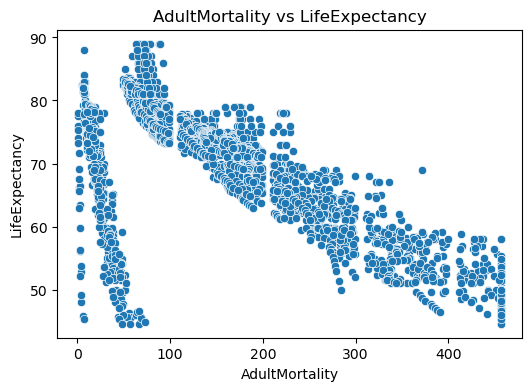

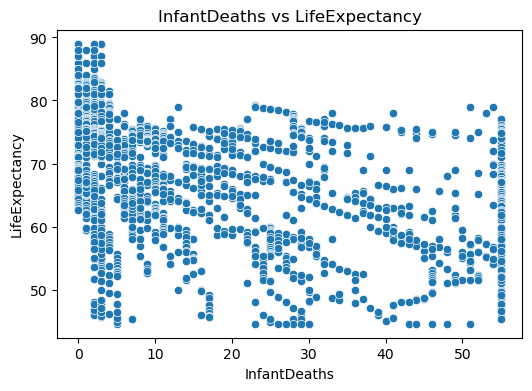

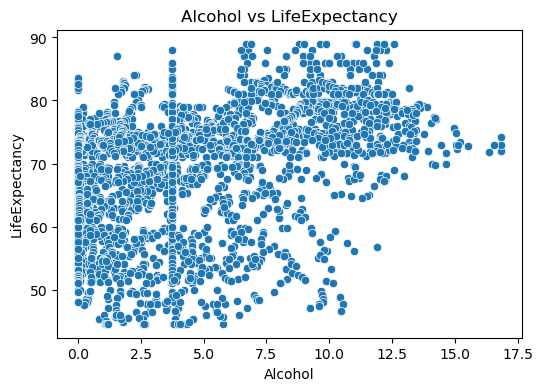

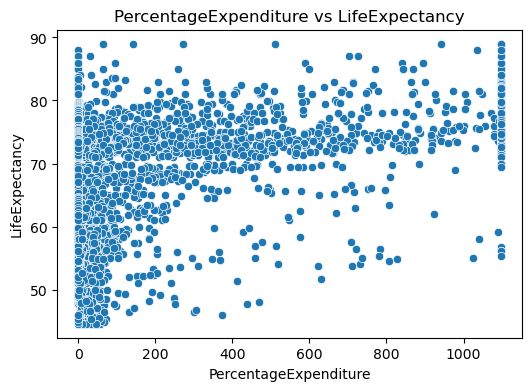

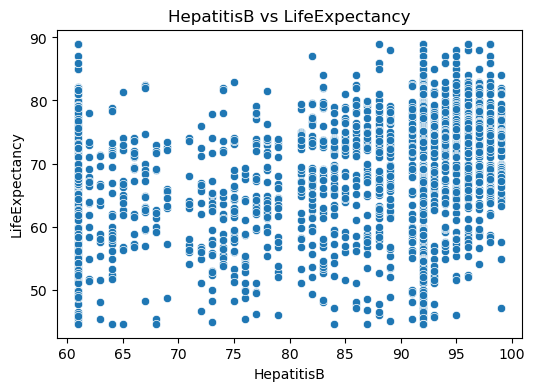

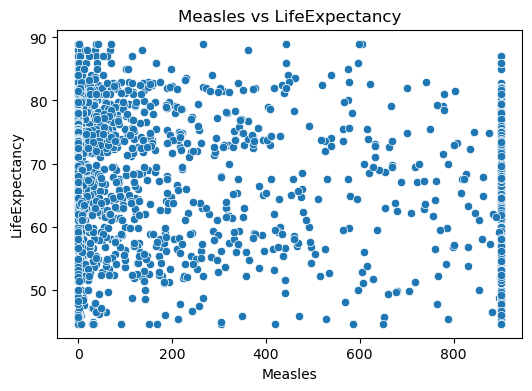

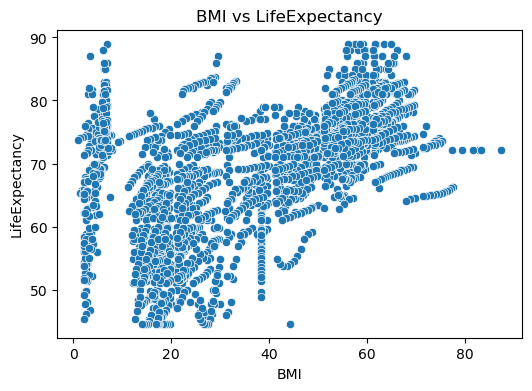

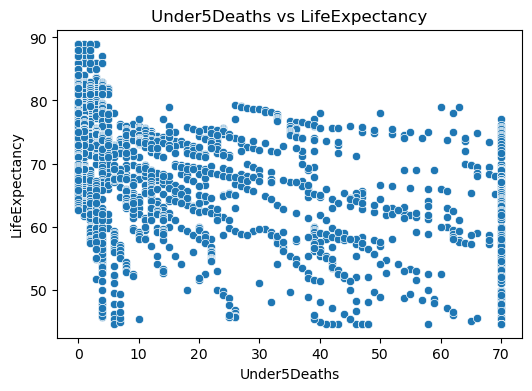

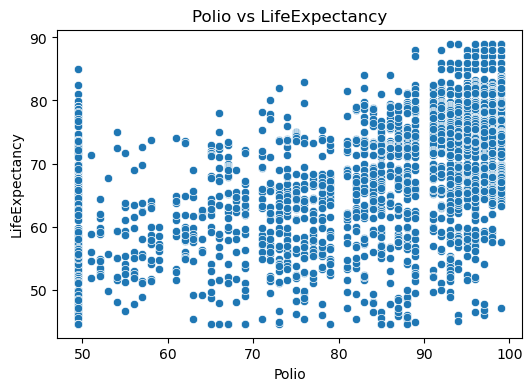

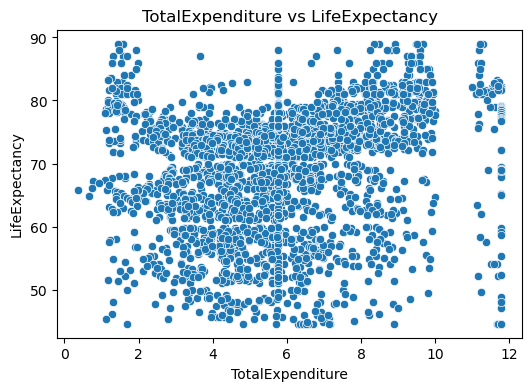

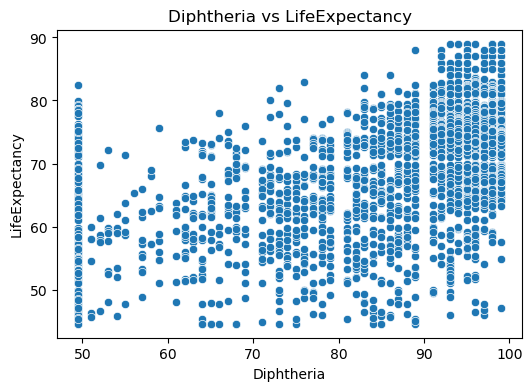

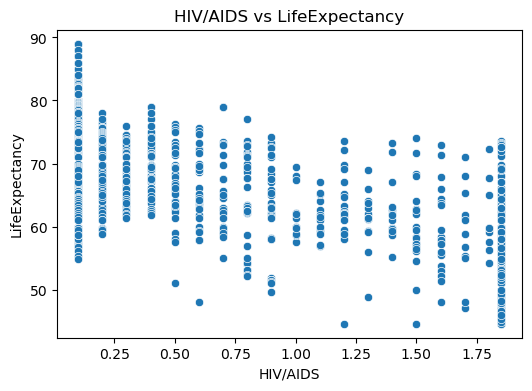

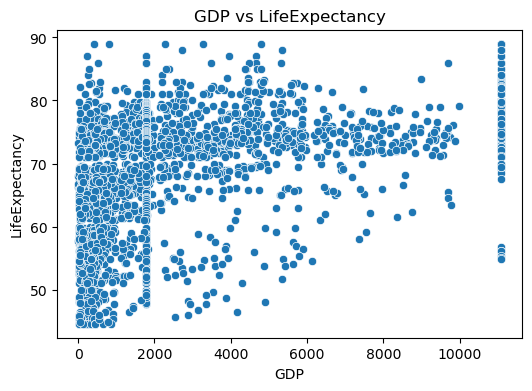

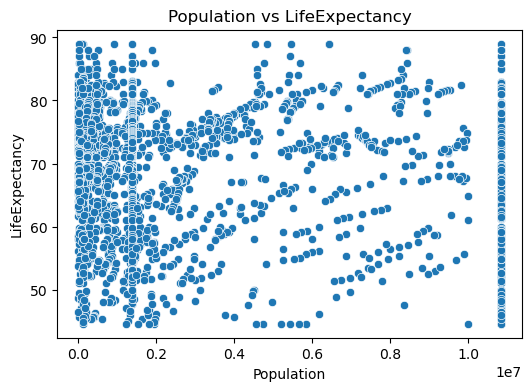

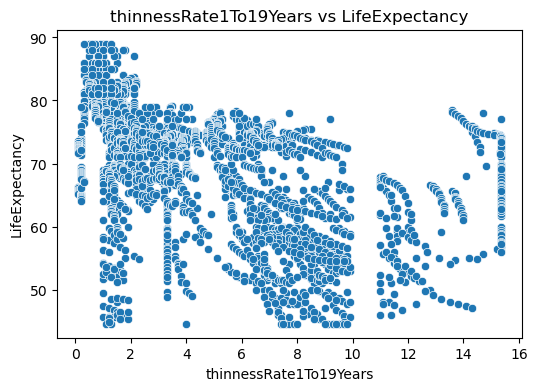

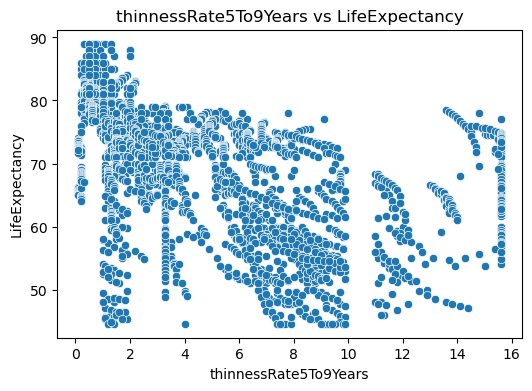

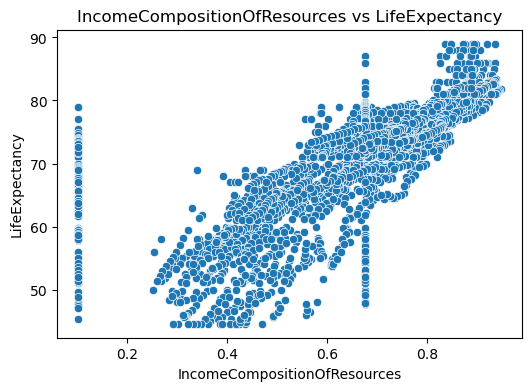

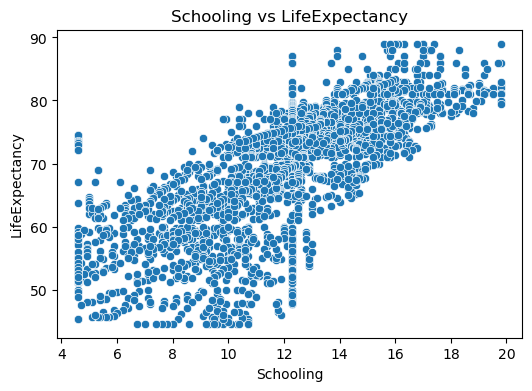

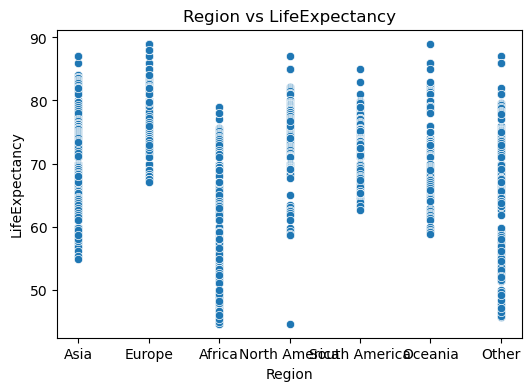

In [168]:
# Define independent variables (excluding LifeExpectancy)
independent_vars = [col for col in df.columns if col != 'LifeExpectancy']

# Create scatter plots for each independent variable against SalePrice
for col in independent_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['LifeExpectancy'])
    plt.xlabel(col)
    plt.ylabel('LifeExpectancy')
    plt.title(f'{col} vs LifeExpectancy')
    plt.show()

In [ ]:
#b: Implement hyperparameter tuning by conducting a grid search or random search to optimize model parameters.
# Clearly outline the hyperparameters you tuned and the rationale behind them.

In [198]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge

# Define the model
ridge = Ridge()

# Define the parameter grid for Grid Search
param_grid = {'alpha': np.logspace(-3, 3, 50)}  # Exploring a range of alpha values from 0.001 to 1000

#Ridge Regression - with Grid search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and print the result
best_ridge_model_grid = grid_search.best_estimator_
print("Grid Search for Ridge Regression:")
print(f"Best Alpha: {grid_search.best_params_['alpha']}")

Grid Search for Ridge Regression:
Best Alpha: 0.3727593720314938


In [200]:
# Define the parameter distribution for Random Search
param_dist = {'alpha': np.logspace(-3, 3, 50)}  # Same range of alpha values, but randomized selection

# Random Search: Randomly tests a fixed number of hyperparameter combinations 
random_search = RandomizedSearchCV(estimator=ridge, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Get the best model and print the result
best_ridge_model_random = random_search.best_estimator_
print("\nRandom Search for Ridge Regression:")
print(f"Best Alpha: {random_search.best_params_['alpha']}")


Random Search for Ridge Regression:
Best Alpha: 0.21209508879201905


In [204]:
# Define Lasso model
lasso = Lasso()

# Perform Grid Search
lasso_grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

# Store the best alpha for later use
best_alpha_lasso = lasso_grid_search.best_params_['alpha']
print("Best Alpha for Lasso (Grid Search):", best_alpha_lasso)
best_lasso = lasso_grid_search.best_estimator_  # Store the best Lasso model


Best Alpha for Lasso (Grid Search): 0.001


In [206]:
# Define Lasso model
lasso = Lasso()

# Perform Random Search with 20 iterations
lasso_random_search = RandomizedSearchCV(estimator=lasso, param_distributions=param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
lasso_random_search.fit(X_train, y_train)

# Store the best alpha for later use
best_alpha_lasso = lasso_random_search.best_params_['alpha']
print("Best Alpha for Lasso (Random Search):", best_alpha_lasso)

best_lasso = lasso_random_search.best_estimator_  # Store the best Lasso model

Best Alpha for Lasso (Random Search): 0.002329951810515372


In [208]:
best_alpha_ridge = ridge_grid_search.best_params_['alpha']  # Best alpha from Ridge tuning
best_alpha_lasso = lasso_grid_search.best_params_['alpha']  # Best alpha from Lasso tuning

print("Best Alpha for Ridge:", best_alpha_ridge)
print("Best Alpha for Lasso:", best_alpha_lasso)

# Build the regression models using the training data

# Train Ridge Regression using the best alpha
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train, y_train)
print("Ridge Regression model trained successfully.")

# Train Lasso Regression using the best alpha
lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train, y_train)

print("Lasso Regression model trained successfully.")

Best Alpha for Ridge: 0.3727593720314938
Best Alpha for Lasso: 0.001
Ridge Regression model trained successfully.
Lasso Regression model trained successfully.


In [202]:
#Ridge Regression - with Grid search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

from sklearn.linear_model import Ridge
ridge = Ridge()
param_grid = {'alpha': np.logspace(-3, 3, 50)}

In [194]:
ridge_grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid,cv=5, scoring='neg_mean_squared_error')
#scoring='neg_mean_squared_error: Use MSE as evaluation metric
ridge_grid_search.fit(X_train, y_train)
 
best_ridge_model = ridge_grid_search.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)
 
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, y_pred_ridge)
 
print("Ridge Regression - Grid Search")
print(f"Best Alpha: {ridge_grid_search.best_params_['alpha']}")
print(f"MSE: {ridge_mse:.2f}, RMSE: {ridge_rmse:.2f}, R²: {ridge_r2:.2f}")

Ridge Regression - Grid Search
Best Alpha: 0.3727593720314938
MSE: 11.76, RMSE: 3.43, R²: 0.86


In [210]:
ridge_random_search = RandomizedSearchCV(estimator=ridge, param_distributions = param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error',random_state=42)
 
#n_iter=10: Test 10 random alpha values
ridge_random_search.fit(X_train, y_train)
 
best_ridge_model_random = ridge_random_search.best_estimator_
y_pred_ridge_random = best_ridge_model_random.predict(X_test)
 
ridge_random_mse = mean_squared_error(y_test, y_pred_ridge_random)
ridge_random_rmse = np.sqrt(ridge_random_mse)
ridge_random_r2 = r2_score(y_test, y_pred_ridge_random)
 
print("\nRidge Regression - Random Search")
print(f"Best Alpha: {ridge_random_search.best_params_['alpha']}")
print(f"MSE: {ridge_random_mse:.2f}, RMSE: {ridge_random_rmse:.2f}, R²: {ridge_random_r2:.2f}")


Ridge Regression - Random Search
Best Alpha: 0.21209508879201905
MSE: 11.76, RMSE: 3.43, R²: 0.86


In [212]:
# Define the Lasso regression model
from sklearn.linear_model import Lasso
lasso = Lasso()
 
lasso_grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
 
lasso_grid_search.fit(X_train, y_train)
 
# Get the best model from Grid Search and evaluate it

best_lasso_model_grid = lasso_grid_search.best_estimator_

y_pred_lasso_grid = best_lasso_model_grid.predict(X_test)
 
lasso_grid_mse = mean_squared_error(y_test, y_pred_lasso_grid)

lasso_grid_rmse = np.sqrt(lasso_grid_mse)

lasso_grid_r2 = r2_score(y_test, y_pred_lasso_grid)
 
print("\nLasso Regression - Grid Search")

print(f"Best Alpha: {lasso_grid_search.best_params_['alpha']}")

print(f"MSE: {lasso_grid_mse:.2f}, RMSE: {lasso_grid_rmse:.2f}, R²: {lasso_grid_r2:.2f}")


Lasso Regression - Grid Search
Best Alpha: 0.001
MSE: 11.76, RMSE: 3.43, R²: 0.86


In [ ]:
# Random Search for Lasso
lasso_random_search = RandomizedSearchCV(estimator=lasso, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error',random_state=42)
lasso_random_search.fit(X_train, y_train)
 
# Get the best model from Random Search and evaluate it
best_lasso_model_random = lasso_random_search.best_estimator_
y_pred_lasso_random = best_lasso_model_random.predict(X_test)
 
lasso_random_mse = mean_squared_error(y_test, y_pred_lasso_random)
lasso_random_rmse = np.sqrt(lasso_random_mse)
lasso_random_r2 = r2_score(y_test, y_pred_lasso_random)
 
print("\nLasso Regression - Random Search")
print(f"Best Alpha: {lasso_random_search.best_params_['alpha']}")
print(f"MSE: {lasso_random_mse:.2f}, RMSE: {lasso_random_rmse:.2f}, R²: {lasso_random_r2:.2f}")

In [ ]:
import pandas as pd
# If y_test values range between 0 and 100, an RMSE of 3.42 would indicate good performance. 
#However, if the range is 0 to 10, this would suggest room for improvement.
# Assuming y_test is a Pandas Series
#print(f"y_test range: {y_test.min()} to {y_test.max()}")


In [ ]:
#y_train_pred = best_ridge_model.predict(X_train)
#ridge_train_r2 = r2_score(y_train, y_train_pred)
#print(f"Train R²: {ridge_train_r2:.2f}, Test R²: {ridge_r2:.2f}")


In [ ]:
#print(f"Mean CV Score: {ridge_grid_search.cv_results_['mean_test_score'].mean():.2f}")
#print(f"Std CV Score: {ridge_grid_search.cv_results_['std_test_score'].mean():.2f}")


In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_ridge
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Actuals")
plt.show()

In [ ]:
#c: Build the regression models using the training data. Describe the process and provide code snippets.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features ( for Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Default alpha value
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test_scaled)


In [ ]:
# PARTA - TASK3: MODEL EVALUATION AND SELECTION

In [ ]:
#a: Evaluate the performance of the regression models using appropriate metrics. Calculate and interpret these metrics.

In [214]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation
mae = mean_absolute_error(y_test, y_pred_ridge)
#mse = mean_squared_error(y_test, y_pred_ridge)  # Define MSE before using it
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred_ridge)

# Print evaluation metrics
print("Ridge Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
#print(f"Mean Squared Error (MSE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")  
print(f"R-squared (R²): {r2:.2f}")

Ridge Regression Model Evaluation:
Mean Absolute Error (MAE): 2.60
Root Mean Squared Error (RMSE): 3.43
R-squared (R²): 0.86


In [ ]:
# Evaluation for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
#mse_linear = mean_squared_error(y_test, y_pred_linear)  
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("\nLinear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")
#print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.2f}")
print(f"R-squared (R²): {r2_linear:.2f}")

In [218]:
# Train Lasso Regression model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_train, y_train)
# Make predictions with Lasso model
y_pred_lasso = lasso.predict(X_test)
# Evaluation for Lasso Regression
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
#mse_lasso = mean_squared_error(y_test, y_pred_lasso)  
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("\nLasso Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
#print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"R-squared (R²): {r2_lasso:.2f}")

NameError: name 'mse_lasso' is not defined

In [ ]:
#b: Implement k-fold cross-validation (5-fold or 10-fold) to assess the model's generation performance using multiple splits.

In [220]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
import numpy as np

# Define the model
ridge = Ridge(alpha=0.3727)  # Using the best alpha from previous tuning
# Define k-fold cross-validation (5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate scores
cv_scores = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='r2')
# Print results
print("Ridge Regression Model:")
print("Cross-Validation R² Scores:", cv_scores)
print(f"Mean R² Score: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of R² Scores: {np.std(cv_scores):.2f}")

Ridge Regression Model:
Cross-Validation R² Scores: [0.85874116 0.85909248 0.8719551  0.85037855 0.86393539]
Mean R² Score: 0.86
Standard Deviation of R² Scores: 0.01


In [222]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define models
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.001)  

# Define k-fold cross-validation (5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for Linear Regression
cv_scores_linear = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring='r2')

# Perform cross-validation for Lasso Regression
cv_scores_lasso = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring='r2')

# Print results
print("Linear Regression Cross-Validation R² Scores:", cv_scores_linear)
print(f"Mean R² Score (Linear): {np.mean(cv_scores_linear):.2f}")
print(f"Standard Deviation of R² Scores (Linear): {np.std(cv_scores_linear):.2f}")

print("\nLasso Regression Cross-Validation R² Scores:", cv_scores_lasso)
print(f"Mean R² Score (Lasso): {np.mean(cv_scores_lasso):.2f}")
print(f"Standard Deviation of R² Scores (Lasso): {np.std(cv_scores_lasso):.2f}")

Linear Regression Cross-Validation R² Scores: [0.85858746 0.85900877 0.87221313 0.85024536 0.86399877]
Mean R² Score (Linear): 0.86
Standard Deviation of R² Scores (Linear): 0.01

Lasso Regression Cross-Validation R² Scores: [0.8587255  0.85914775 0.8719151  0.8503315  0.86397482]
Mean R² Score (Lasso): 0.86
Standard Deviation of R² Scores (Lasso): 0.01


In [ ]:
#c: Select best performing regression model based hyperparameter tuning and cross-validation results.